In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.shape

(1599, 12)

In [4]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<strong>
    Our dataset has 1599 rows and 12 columns.
    <ul>Our Columns Represent the different pysiochemical properties of the wine and the last column(quality) represents the Quality score of the wine.
        <li>Fixed Acidity - Continuous - Represent the fixed acitdity of the wine</li>
        <li>Volatile Acidity - Continuos - Represents the volatile acidity of the wine</li>
        <li>Citric Acid - Continuos - Represent the citric acid content in the wine</li>
        <li>Residual Sugar - Continuos - Represent the Residual Sugar in the wine</li>
        <li>Chloride - Conitnuos - Represents the Content of chlorides in the wine</li>
        <li>Free Sulphur Dioxide - Continuos - Represent the free Sulphur dioxide in the wine</li>
        <li>Total Sulphur Dioxide - Continuos - Represents the Total Sulphur Dioxide in the wine</li>
        <li>Density - Continuos - Represent the Density of the wine</li>
        <li>pH - Continuos - Represent the pH value of the wine</li>
        <li>Sulphates - Continuos - Represent the value of sulphates in the wine</li>
        <li>Alcohol - Continuos - Represent the Alcohol content in the wine</li>
        <li>Quality - Categorical - Target Variable - Represents the Quality of the wine</li>
    </ul>
</strong>

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<strong>There are no null values in our dataset</strong>

<strong>As we have to predict a categorical column we have a classification Problem here</strong>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<strong><h3>A point to mention -:
    As we have more than 2 values in our outcome variable, we can set a threshold above an arbitary value to be considerd as good quality wine(1) and below that the wine will be considred as not good(0).
    We will choose 6 as that arbitary value. The reason why we do this is because the classification report and confusion matrix are more interpretable if we look into two values. So, we will build every algorithm on tow outcome 
    variables, i.e. for every algorithm we will build two models and for EDA part also we will perform it on both outcome variables.
    </h3></strong>

Creating Outcome Variable with only two unique values

In [16]:
binary_quality = []
for i in data['quality']:
    if i<6:
        binary_quality.append(0)
    else:
        binary_quality.append(1)

data['binary_qua'] = binary_quality

In [17]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  binary_qua  
0      9.4        5           0  
1      9.8        5           0  
2      9.8        5           0  
3      9.8        6           1  
4      9.4        5           0

In [18]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [19]:
data['binary_qua'].unique()

array([0, 1], dtype=int64)

<strong><h2>Exploratory Data Analysis</h2></strong>

<h3>Stripplots</h3>

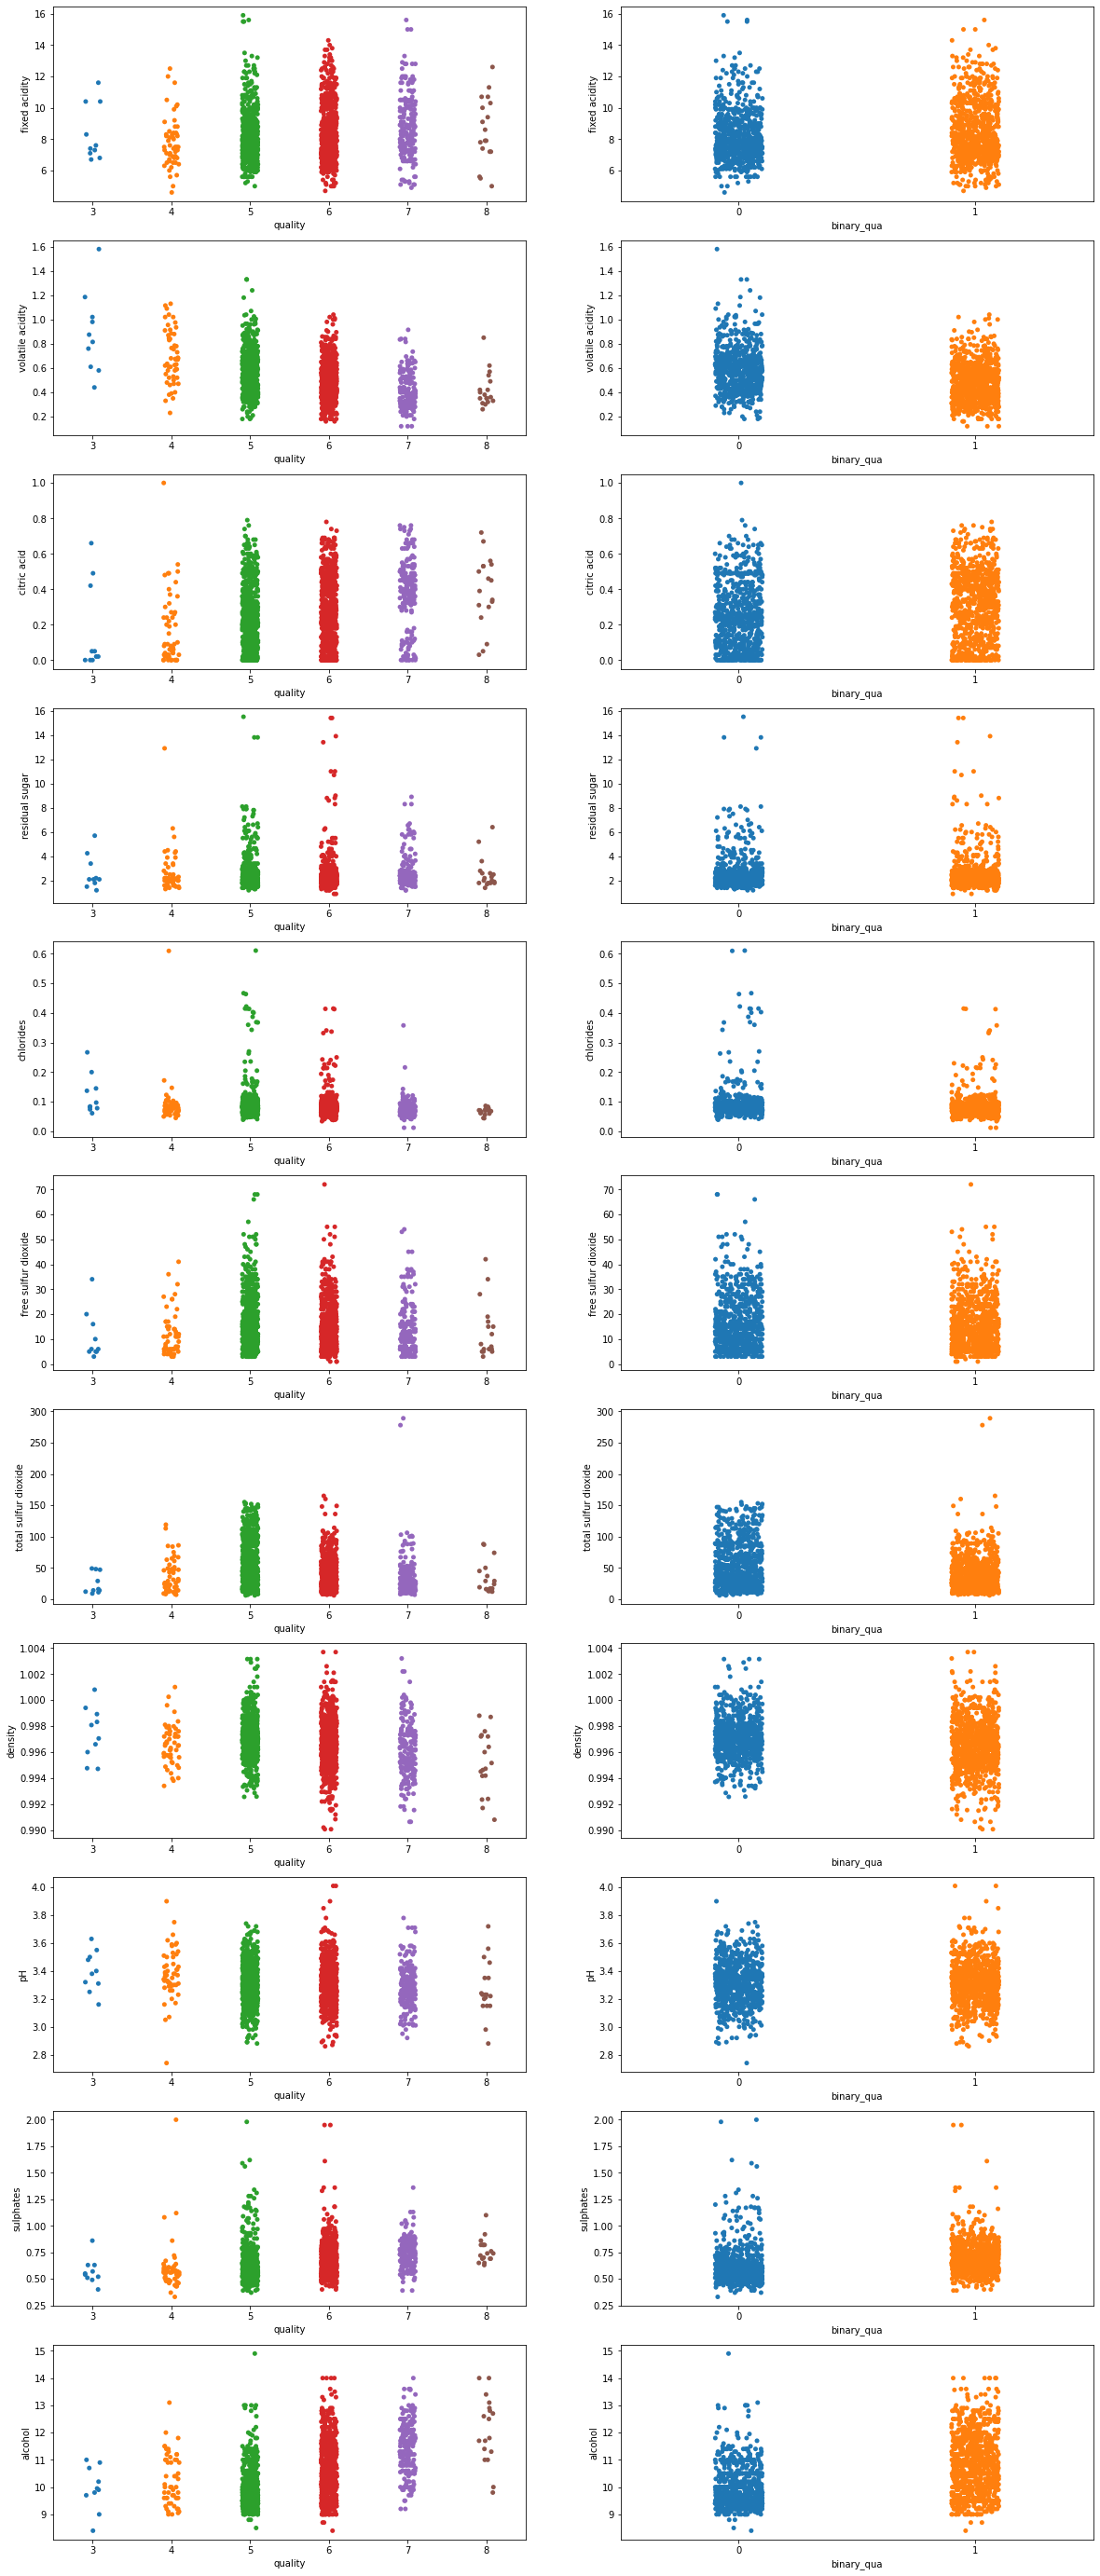

In [31]:
plt.figure(figsize=(20,50))
plotnumber = 1
for i in data.drop(columns=['quality', 'binary_qua']).columns:
    plt.subplot(11, 2, plotnumber)
    sns.stripplot(x='quality', y=i, data=data)
    plt.subplot(11, 2, plotnumber+1)
    sns.stripplot(x='binary_qua', y=i, data=data)
    plotnumber+=2
    

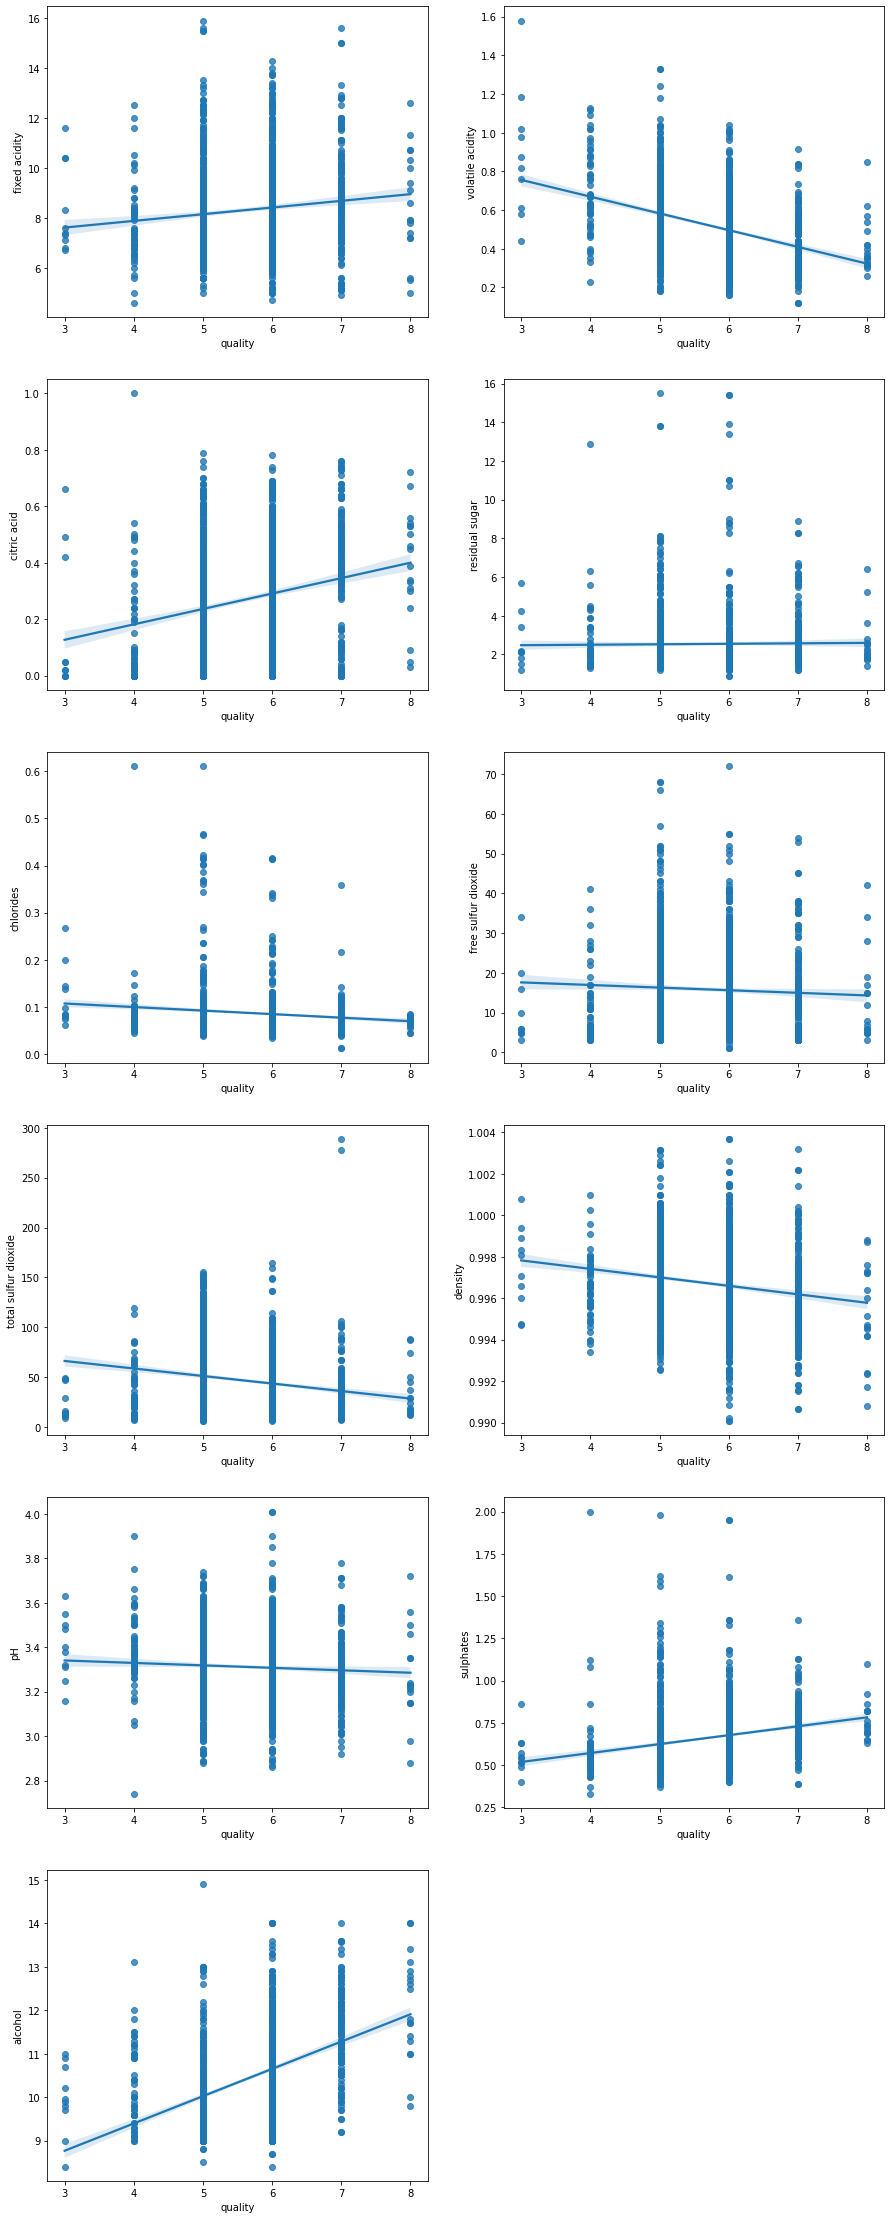

In [38]:
plt.figure(figsize=(15,40))
plotnumber = 1
for i in data.drop(columns=['quality', 'binary_qua']).columns:
    plt.subplot(6, 2, plotnumber)
    sns.regplot(x='quality', y=i, data=data)
    plotnumber+=1

<strong>
    Outcomes of Stripplots and Scatterplots
    <ul>
        <li>If Fixed Acidity is below 10 there are high chance of wine being not good, and if it is above 10 the chances are high of the wine being good. If we look closley at fixed acidity values around 10 and 14, we see that qualtiy 5 has the most values around that region, but the overall values lie in the good region which is 6 to 10. We also see that there is a bell shaped formation in the scatterplot of qualit and fixed acidity, which mean that other factos influence quality as well.</li>
        <li>If Volatile Acidity is below 1.0 there are high chance of wine being good, and if it is above 1.0 the chances are high of the wine being not good. This means that there is a downward trend with volatile acidity, which can also be seen in the scatterplot.</li>
        <li>If Citric is above 0.5 there are high chance of wine being good, and if it is below 0.5 the chances are high of the wine being not good. This means that there is an upward trend with citric acid, which can also be seen in the scatterplot.</li>
        <li>If Residual Sugar is above 8 there are high chance of wine being good, and if it is below 8 then there is uncertainity in the quality of wine. This means that if we have no clear cionclusive trend with residual Sugar, which can also be seen in the scatterplot as there is an alomnst straight regression line parallel to x-axis</li>
        <li>If Chlorides are above 0.3 there are high chance of wine being not good, and if it is below 0.3 then there is uncertainity in the quality of wine. This means that if we have no clear cionclusive trend with Chlorides, which can also be seen in the scatterplot as there is an alomnst straight regression line parallel to x-axis</li>
        <li>If Free Supfur Dioxide is above 45 there are high chance of wine being not good, and if it is below 45 then there is uncertainity in the quality of wine. This means that if we have no clear cionclusive trend with Free Sulfur Dioxide, which can also be seen in the scatterplot as there is an alomst straight regression line parallel to x-axis</li>
        <li>If Total Supfur Dioxide is above 100 there are high chance of wine being not good, and if it is below 100 then there is a slightly high chance that the quality of wine is good. This means that if we have a slight downward trend with Total Sulfur Dioxide, which can also be seen in the scatterplot as there is a negative slope regression line. The two points we see around 300 total sulfur dioxide are probably outliers in our dataset</li>
        <li>If Density is below 0.994 the chances are high that the wine is good, and if it is above 0.994 that the wine is not good. This means that we have a slight downward trend with density, which can also be seen in the scatterplot with the regression line going downwards.</li>
        <li>We cannot see any trend in the plots with the pH values in any range. We might drop the pH column after ceratin more analysis, if we do not found it contributin to our models.</li>
        <li>We can see that sulphate level below 0.5 has a high chance of wine being of poor quality, and above 05. there is no conlcusive trend</li>
        <li>The qualtiy of wine is good if alcohol levels are above 10,  there is a clear upward trend in the quality of wine with alcohol, which can also be seen in the scatterplot</li>
    </ul>
</strong>

<strong><h2>Coutnplots of Outcome Variables</h2><strong>

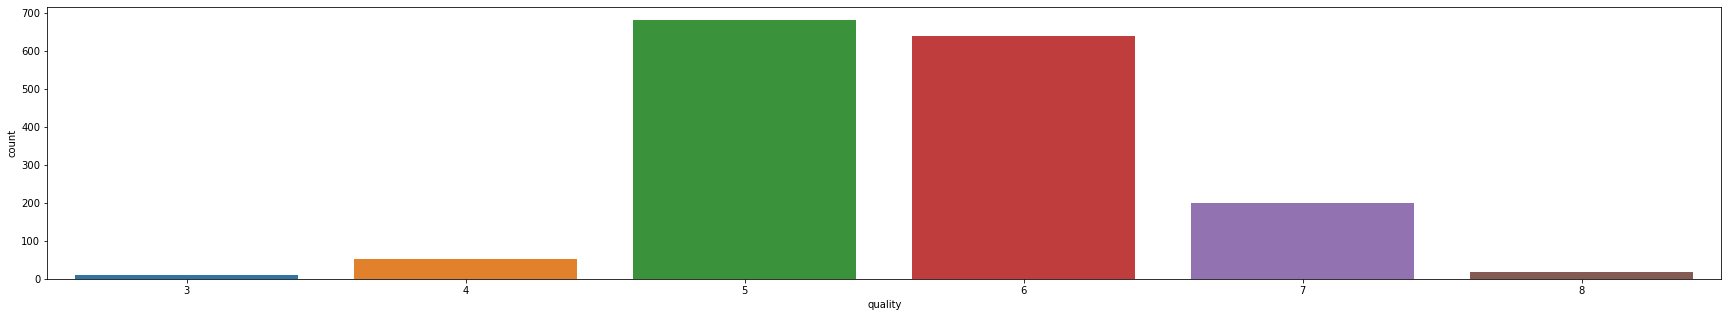

In [40]:
plt.figure(figsize=(30,5))
sns.countplot(x='quality', data=data)

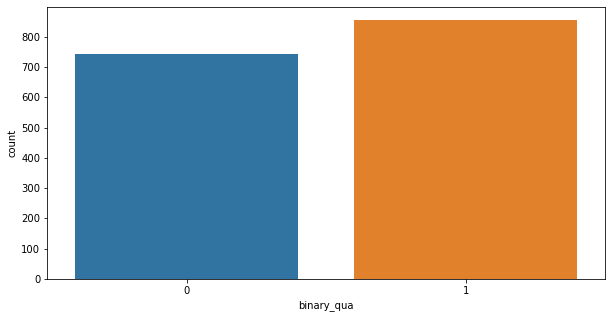

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='binary_qua', data=data)

<strong>We can see that there is no need for oversampling as the counts are fairly equal</strong>

<strong>Getting Mean of different Attributes According to Quality</strong>

In [64]:
quality_list = data.quality.unique()
mean_values_quality = pd.DataFrame(data.quality.unique())
for j in range(0,len(data.drop(columns=['quality', 'binary_qua']).columns.values)):
    means = []
    for qua in quality_list:
        reg = [data.iloc[i, j] for i in range(len(data)) if i==qua]
        reg = pd.Series(reg)
        means.append(reg.mean())
    mean_values_quality[data.drop(columns=['quality','binary_qua']).columns.values[j]] = means
    
mean_values_quality = mean_values_quality.nlargest(6, 0)
mean_values_quality = mean_values_quality.rename(columns={0:'quality'})
mean_values_quality

quality  fixed acidity  volatile acidity  citric acid  residual sugar  \
4        8            7.8              0.58         0.02             2.0   
2        7            7.3              0.65         0.00             1.2   
1        6            7.9              0.60         0.06             1.6   
0        5            7.4              0.66         0.00             1.8   
3        4            7.4              0.70         0.00             1.9   
5        3           11.2              0.28         0.56             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
4      0.073                  9.0                  18.0   0.9968  3.36   
2      0.065                 15.0                  21.0   0.9946  3.39   
1      0.069                 15.0                  59.0   0.9964  3.30   
0      0.075                 13.0                  40.0   0.9978  3.51   
3      0.076                 11.0                  34.0   0.9978  3.51   
5      0.075                 17.0                  60.0   0.9980  3.16   

   sulphates  alcohol  
4       0.57      9.5  
2       0.47     10.0  
1       0.46      9.4  
0       0.56      9.4  
3       0.56      9.4  
5       0.58      9.8

<strong>Plotting Mean of different Attribures according to Qualtiy</strong>

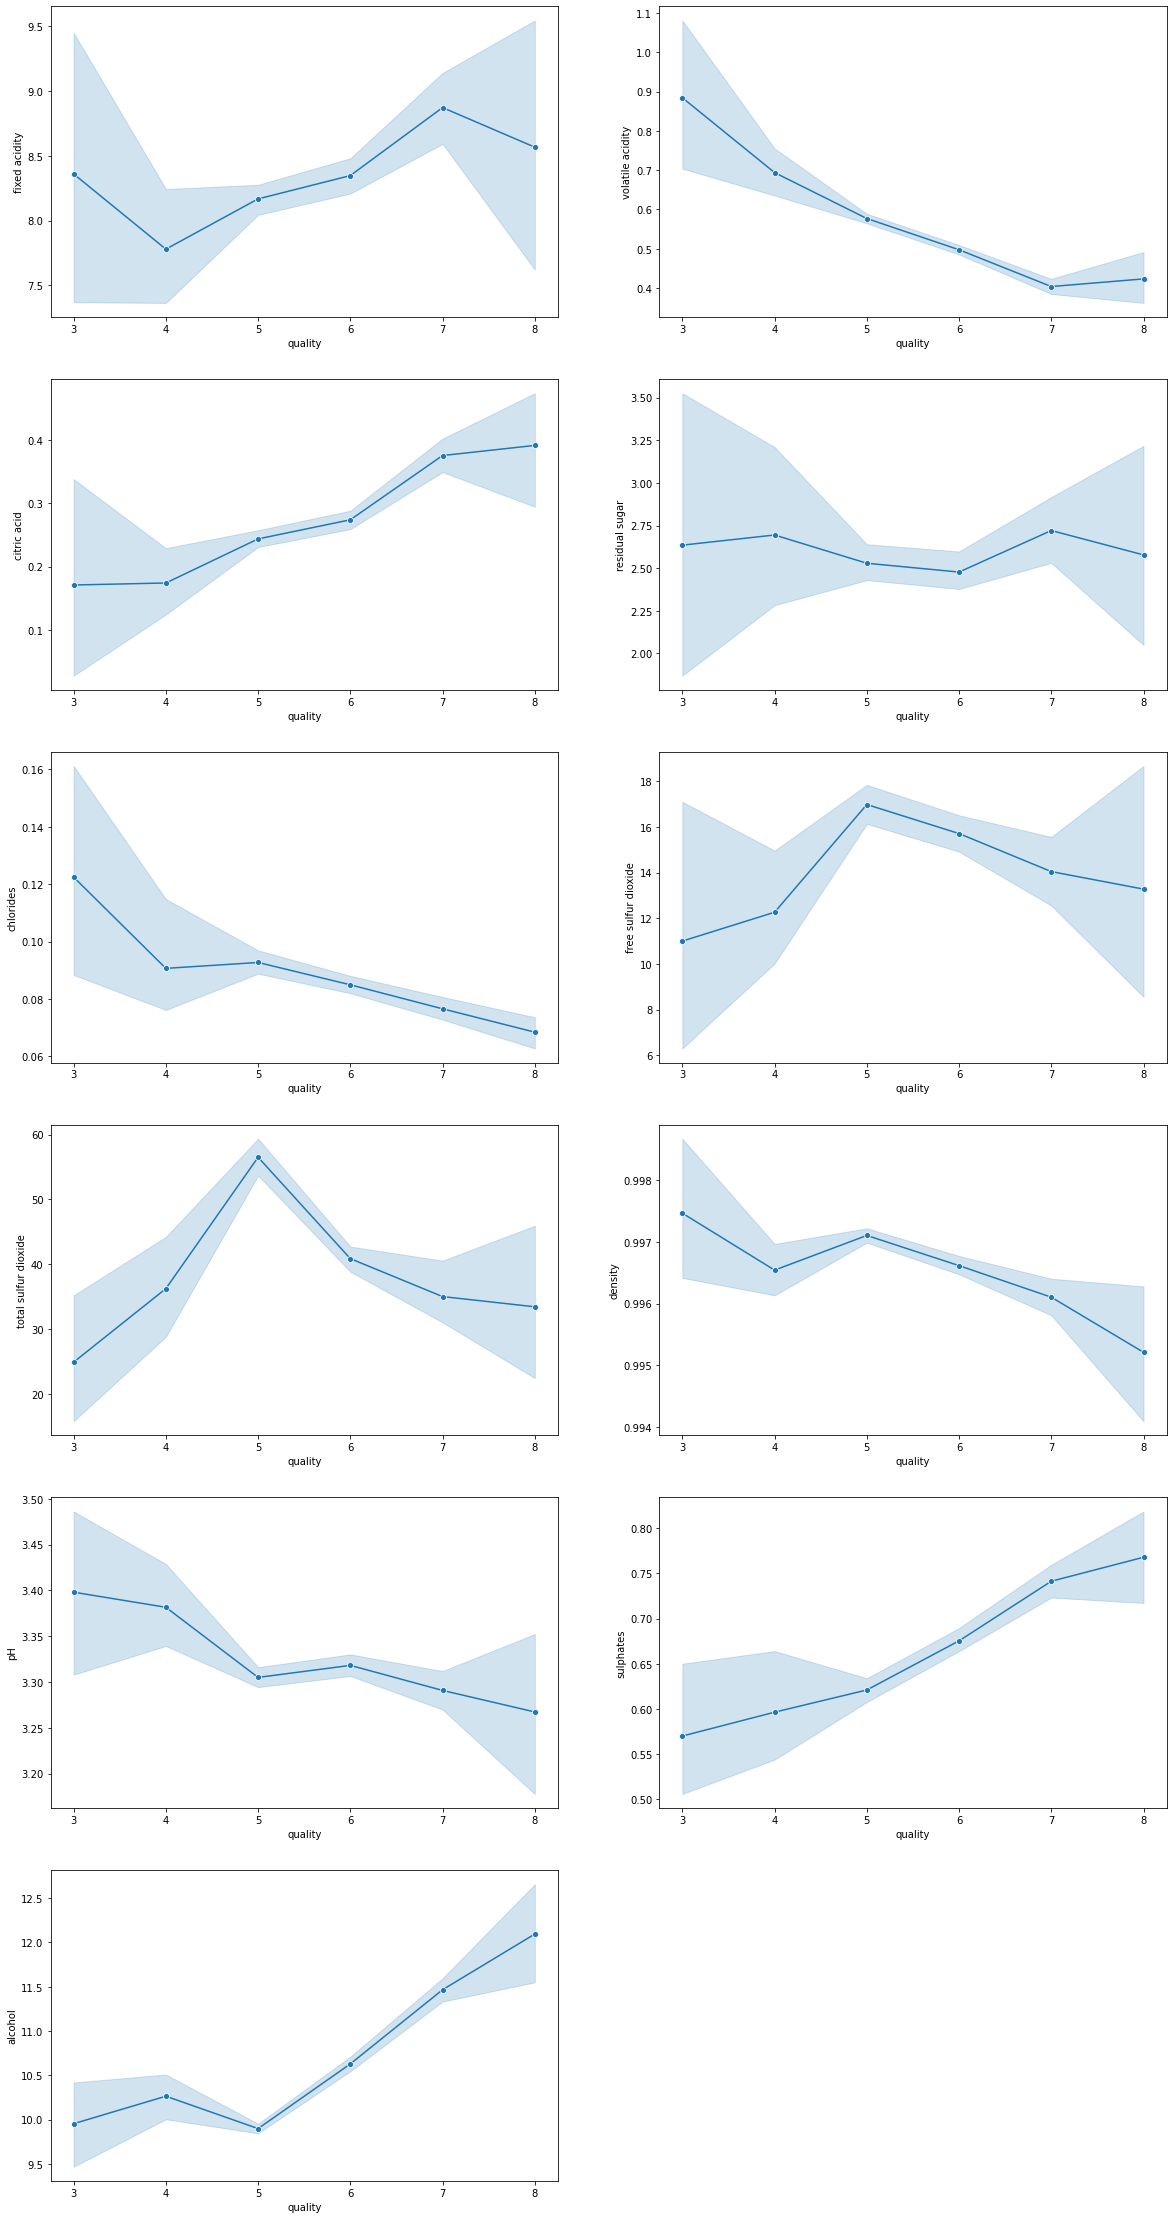

In [71]:
plt.figure(figsize=(20,40))
plotnumber=1
for i in mean_values_quality.drop(columns=['quality']):
    plt.subplot(6,2, plotnumber)
    sns.lineplot(x='quality', y=i, data=data,marker='o')
    plotnumber+=1

<strong>All these plots are verifying the assumptions we made eariler, the trends and the contributions</strong>

<h3>KDE plots of various features with hue as Qualtity</h3>

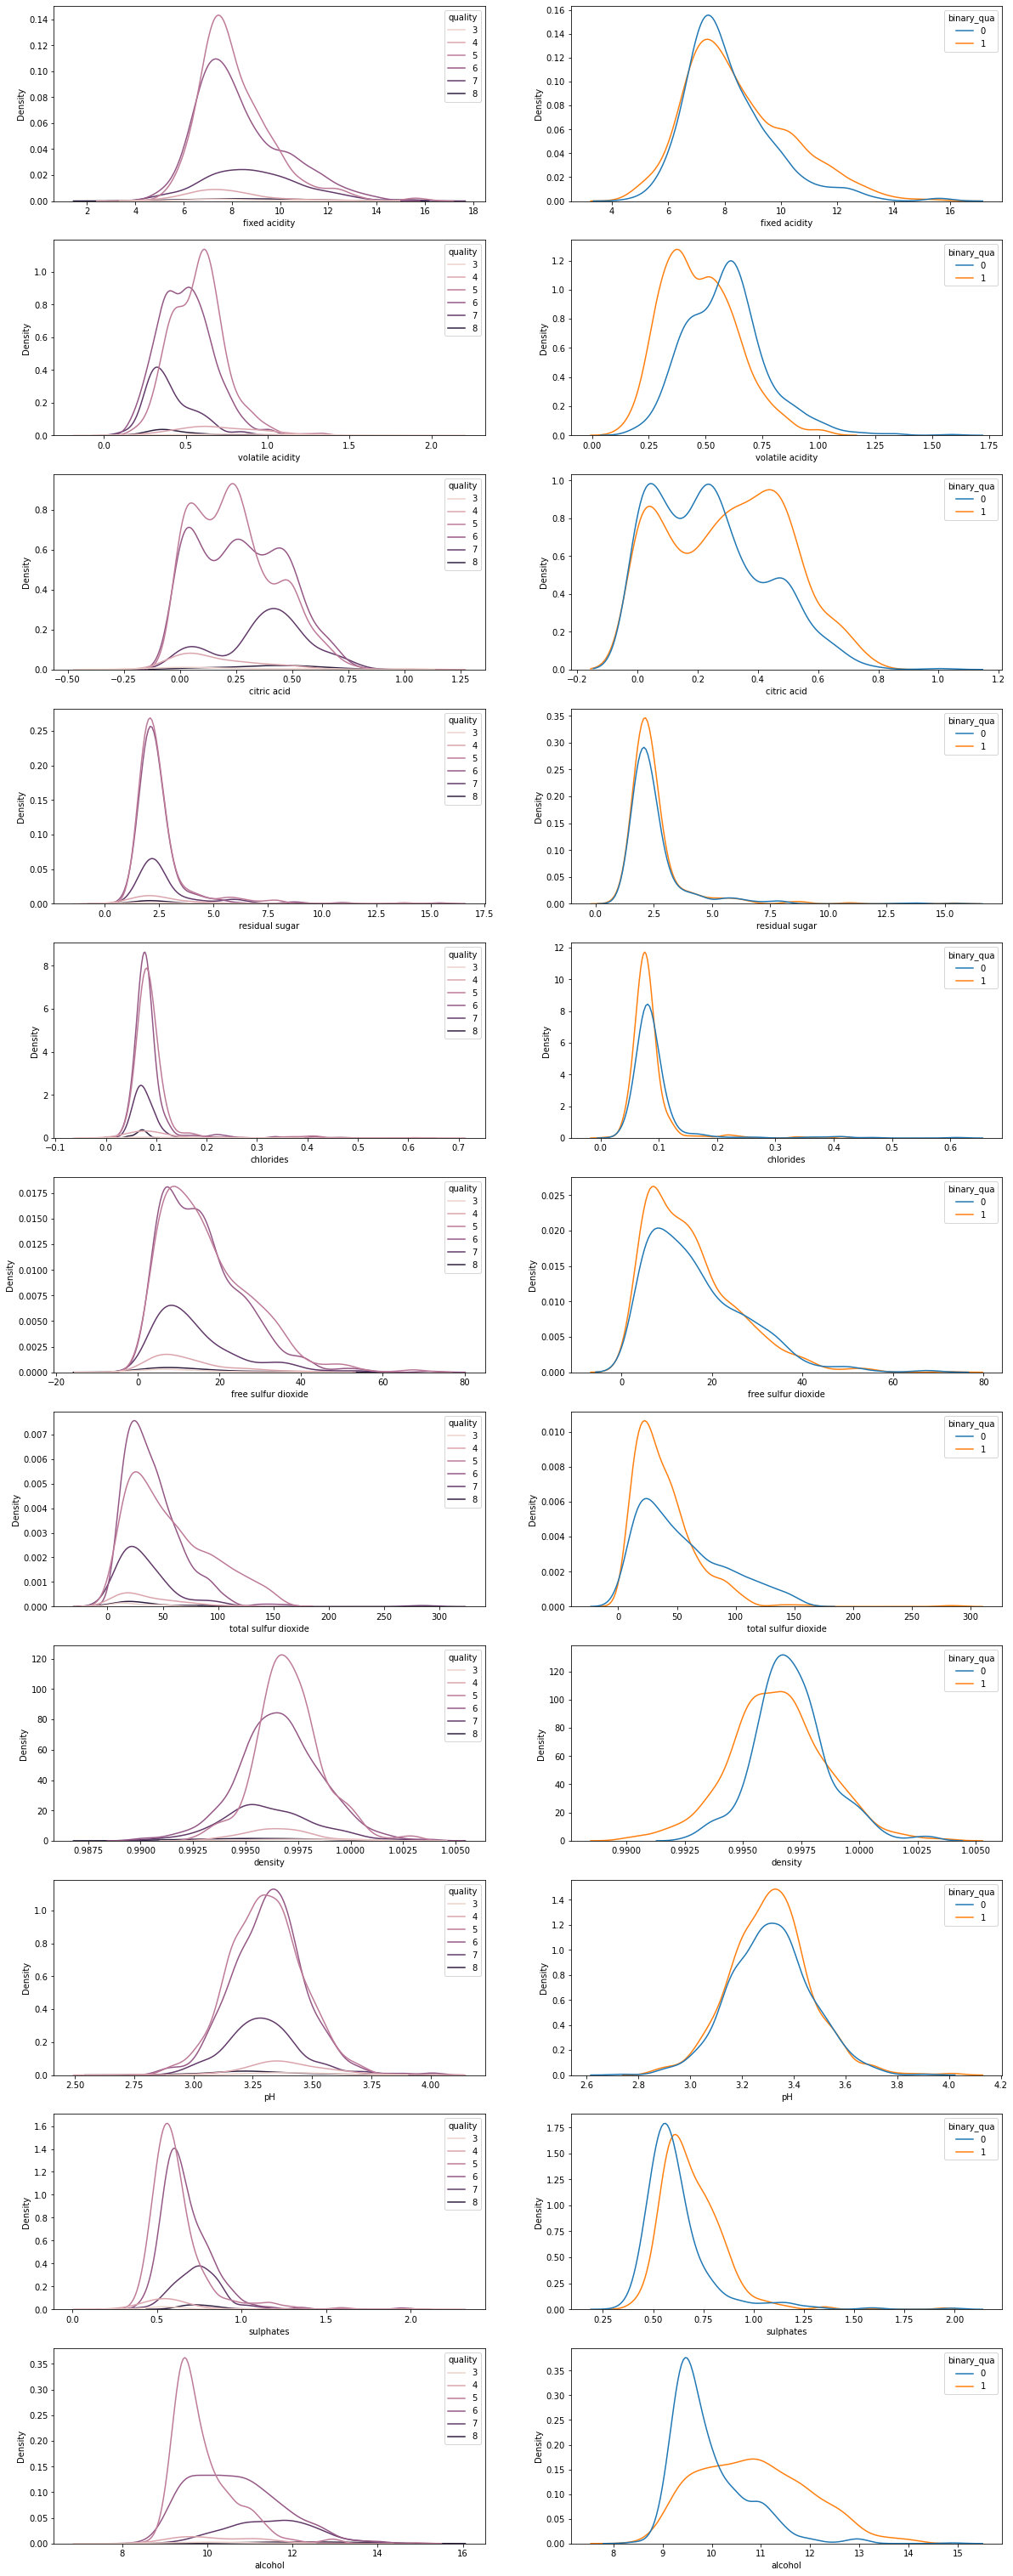

In [81]:
plt.figure(figsize=(20,60))
plotnumber=1
for i in data.drop(columns=['quality', 'binary_qua']):
    plt.subplot(12,2,plotnumber)
    plotnumber+=1
    sns.kdeplot(x=i, hue='quality', data=data)
    plt.subplot(12,2, plotnumber)
    plotnumber+=1
    sns.kdeplot(x=i, hue='binary_qua',data=data)

<strong>Above plots are density plots accoring to different qualities
    <ul>We can see that some features are skewed in some qualities and normal in others. For example, alcohol is skewed for 0 and close to normal for 1. We will handle this later.</ul>
</strong>

<h3>Pairplots</h3>

<Figure size 2160x2160 with 0 Axes>

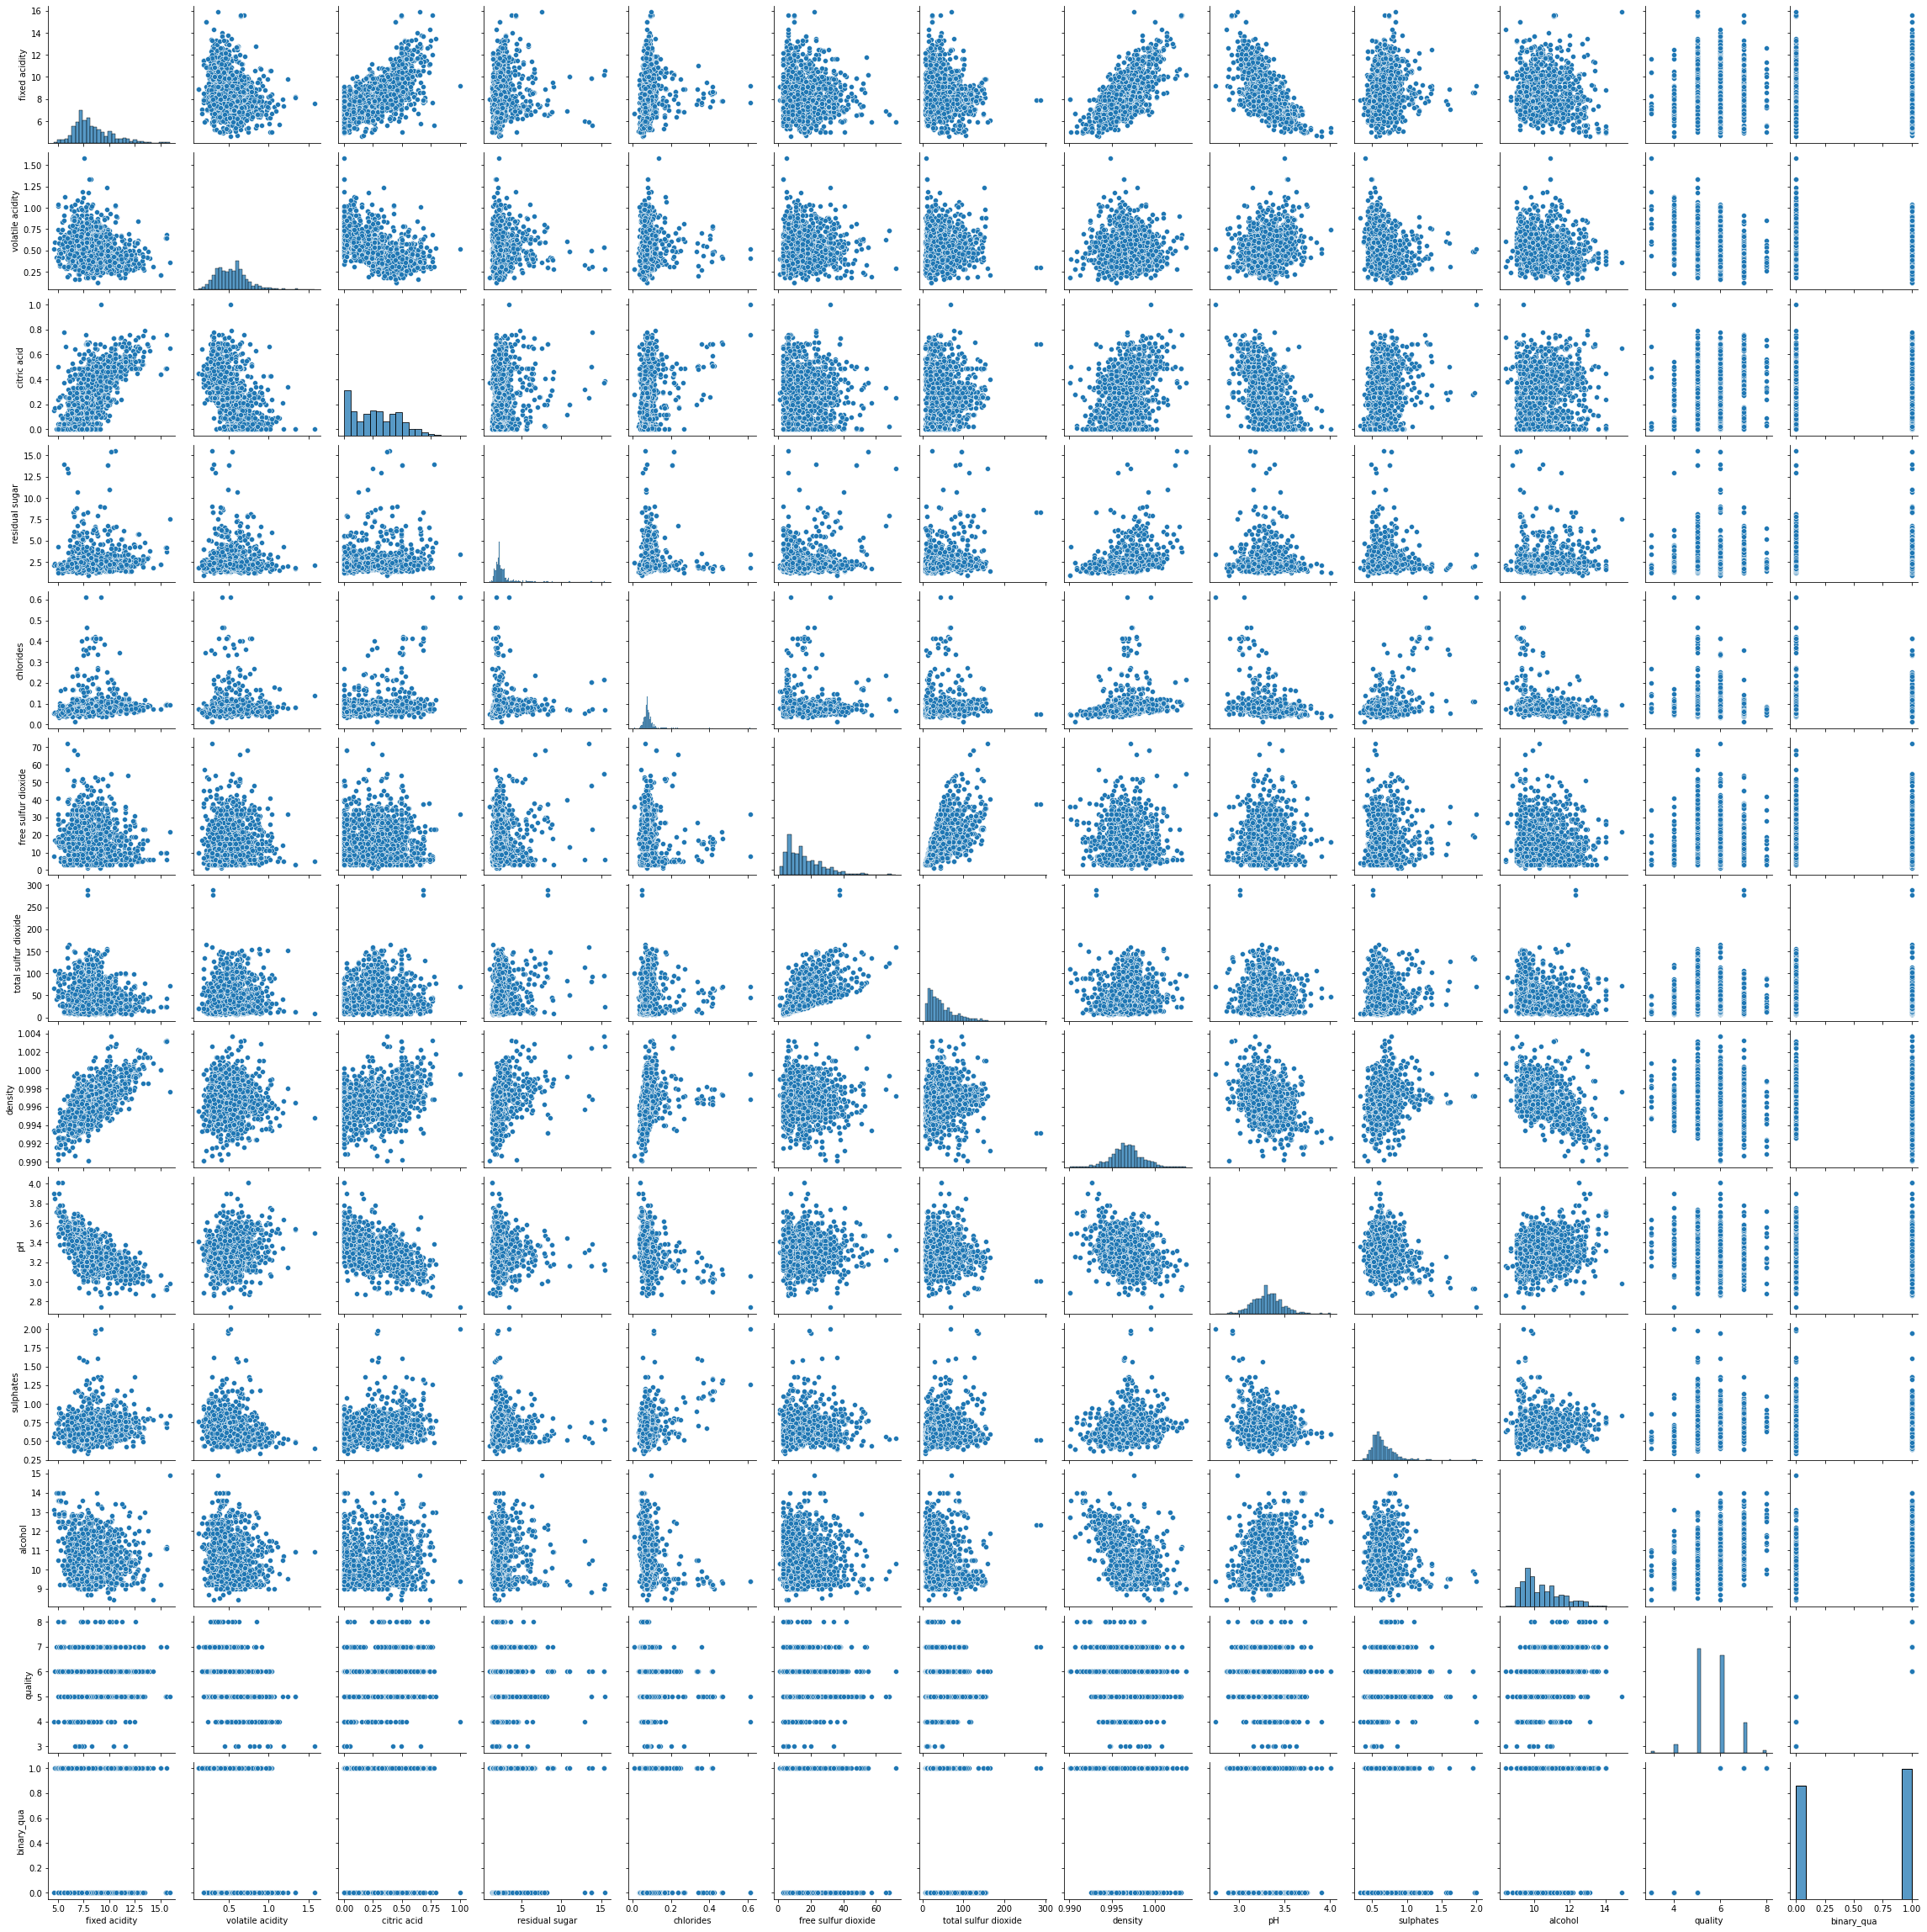

In [85]:
sns.color_palette('bright')
plt.figure(figsize=(30,30))
sns.pairplot(data)
plt.savefig('pairplot_qualtiy.png')
plt.show()

<strong>From Pairplots we can observe that some columns have correlation with each other. These are-:
        <ul>
            <li>Fixed Acidity with citric acid</li>
            <li>Fixed Acidity with pH(Negative)</li>
            <li>Fixed Acidity with Density</li>
            <li>Total Sulfur Dioxide with Free sulfur Dioxide</li>
            <li>Density with Alcohol (Negative)</li>
        </ul>
    These will be handled later when we willuse VIF to remove multicollinearity
</strong>

<h3>Correlation Matrix</h3>



In [88]:
data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   
binary_qua                 0.095093         -0.321441     0.159129   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   
binary_qua                 -0.002160  -0.109494            -0.061757   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   
binary_qua                       -0.231963 -0.159110 -0.003264   0.218072   

                       alcohol   quality  binary_qua  
fixed acidity        -0.061668  0.124052    0.095093  
volatile acidity     -0.202288 -0.390558   -0.321441  
citric acid           0.109903  0.226373    0.159129  
residual sugar        0.042075  0.013732   -0.002160  
chlorides            -0.221141 -0.128907   -0.109494  
free sulfur dioxide  -0.069408 -0.050656   -0.061757  
total sulfur dioxide -0.205654 -0.185100   -0.231963  
density              -0.496180 -0.174919   -0.159110  
pH                    0.205633 -0.057731   -0.003264  
sulphates             0.093595  0.251397    0.218072  
alcohol               1.000000  0.476166    0.434751  
quality               0.476166  1.000000    0.848279  
binary_qua            0.434751  0.848279    1.000000

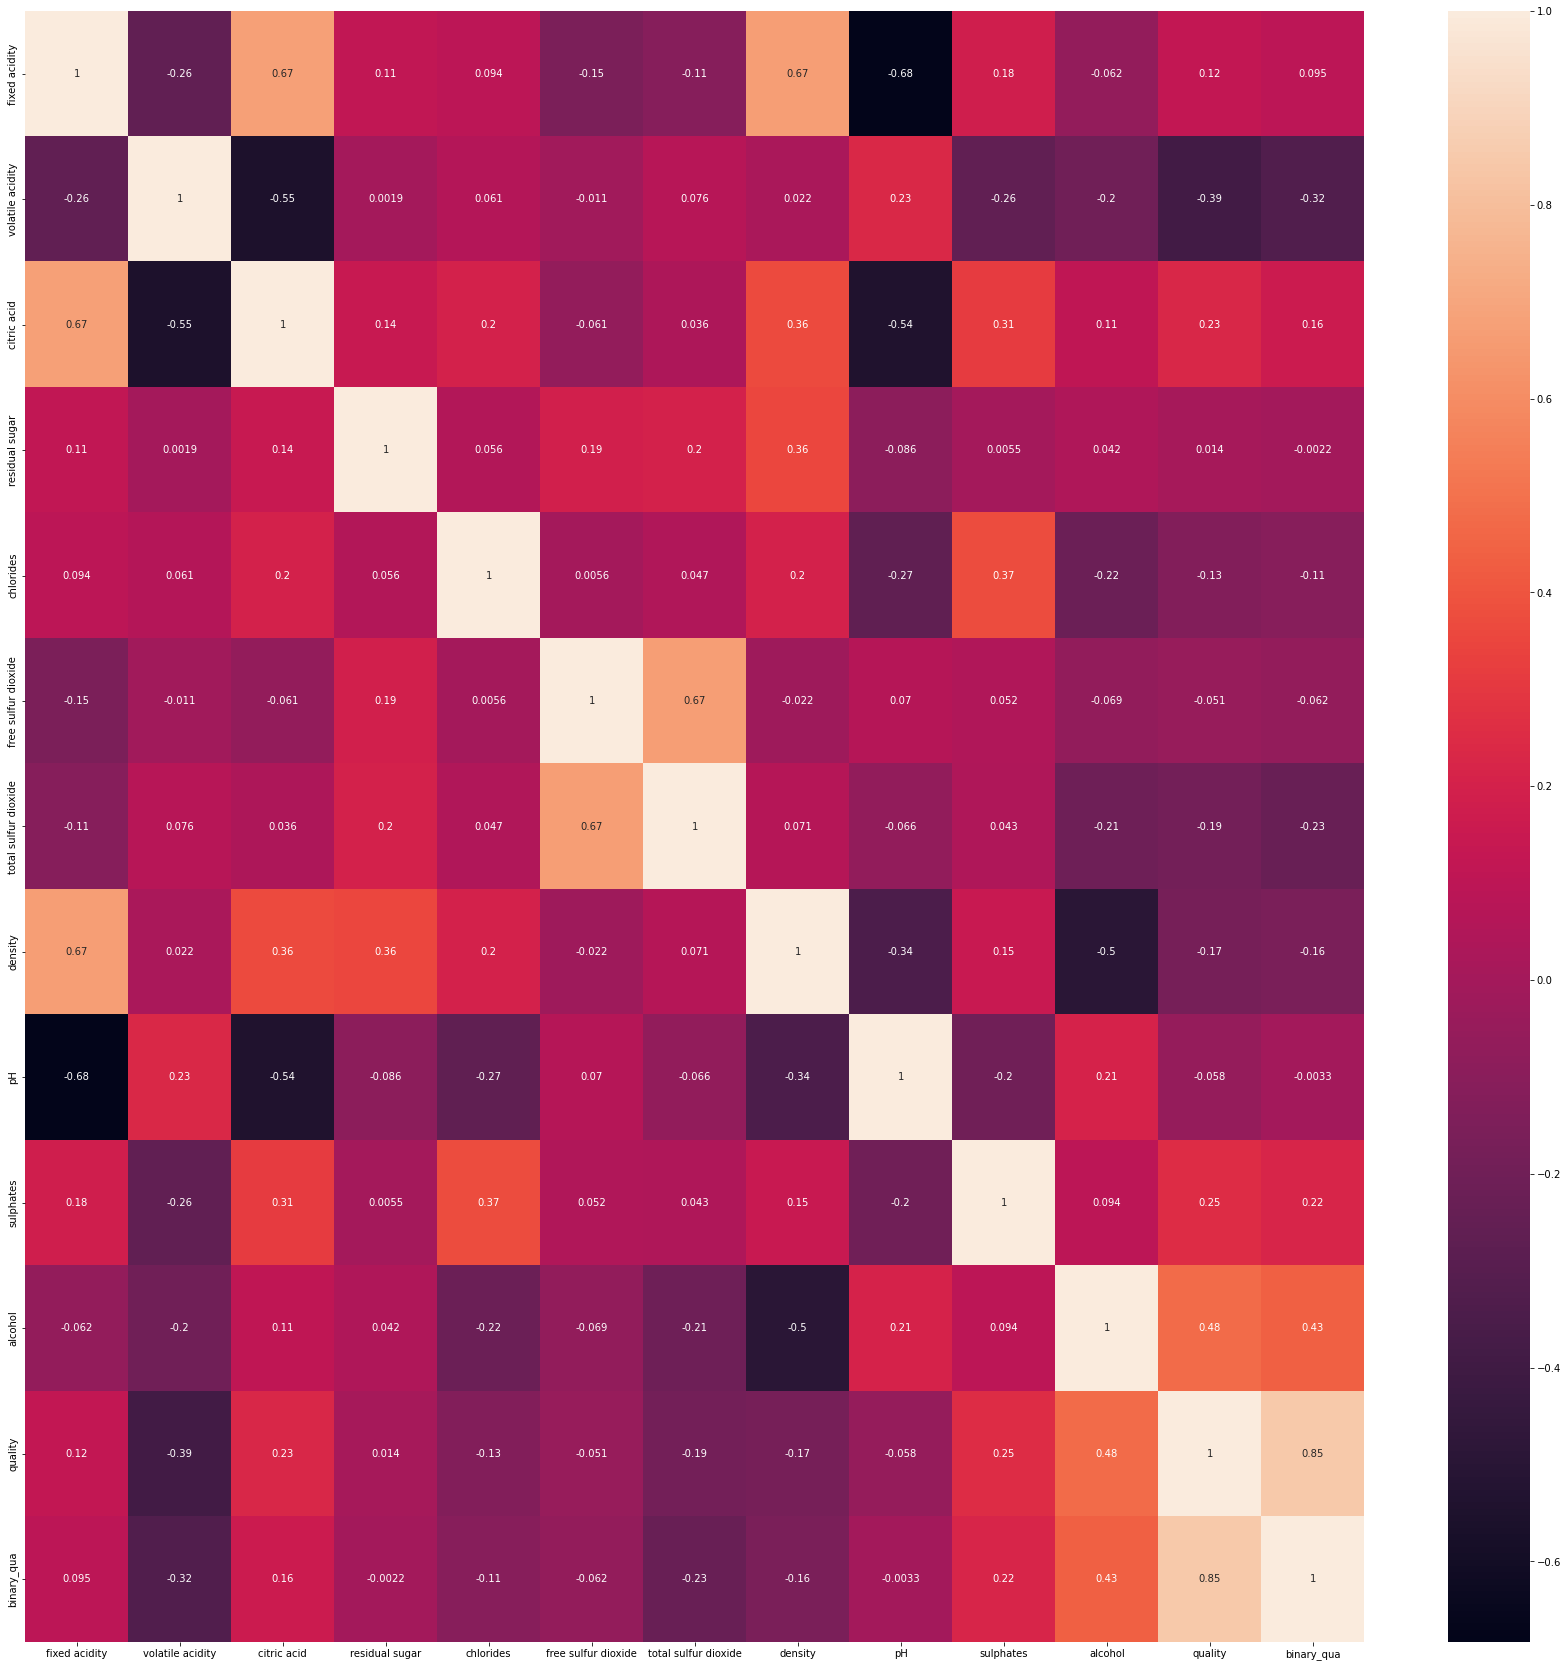

In [91]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True)

<strong>Outcomes Of Correlation Matrix
    <ul>
        <li>Quality has Correlation of 12% with fixed Acidity and Binary_qua has correlation of 9.5% with fixed Acidity</li>
        <li>Quality has Correlation of -39% with volatile Acidity and Binary_qua has correlation of -32% with Volatile Acidity</li>
        <li>Quality has Correlation of 23% with Citric Acidi and Binary_qua has correlation of 0% with Residual Sugar</li>
        <li>Quality has Correlation of 1.4% with Residual Sugar and Binary_qua has correlation of 9.5% with fixed Acidity</li>
        <li>Quality has Correlation of -13% with chlorides and Binary_qua has correlation of -11% with chlorides</li>
        <li>Quality has Correlation of -5% with Free sulfur Dioxide and Binary_qua has correlation of -6% with  Free Sulfur Dioxide</li>
        <li>Quality has Correlation of -19% with Total Sulfur Dioxide and Binary_qua has correlation of -23% with free Sulfur Dioxide</li>
        <li>Quality has Correlation of -17% with Density and Binary_qua has correlation of -16% with Density</li>
        <li>Quality has Correlation of -5% with pH and Binary_qua has correlation of 0% with pH</li>
        <li>Quality has Correlation of 25% with sulphates and Binary_qua has correlation of 22% with sulpahtes</li>
        <li>Quality has Correlation of 48% with alcohol and Binary_qua has correlation of 43% with fixed alcohol</li>
        <li>Fixed Acidity has correlation of -68% with pH</li>
        <li>Fixed Acidity has correlation of 67% with density</li>
        <li>Fixed Acidity has correlation of 67% with citric Acid</li>
        <li>Volatile Acidity has correlation of -55% with citric Acid</li>
        <li>pH has correlation of -54% with cirtic Acid</li>
        <li>Total Sulfur Dioxide has correlation of 67% with free sulfur dioxide</li>
        <li>Alcohol has correlation of 50% with density</li>
    </ul>

</strong>

<h3>Descriptive Statistics</h3>

In [97]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality   binary_qua  
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023     0.534709  
std       0.154386     0.169507     1.065668     0.807569     0.498950  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.210000     0.550000     9.500000     5.000000     0.000000  
50%       3.310000     0.620000    10.200000     6.000000     1.000000  
75%       3.400000     0.730000    11.100000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     8.000000     1.000000

<h4>Interpretations from Desrciptive Statistics</h4>
<ul>
    <li>Fixed Acidity
        <ul>
            <li>Mean -: 8.319637</li>
            <li>STD -: 1.74</li>
            <li>Min -: 4.60</li>
            <li>Max -: 15.90</li>
        </ul>
    </li>
    <li>Volatile Acidity
        <ul>
            <li>Mean -: 0.52</li>
            <li>STD -: 0.17</li>
            <li>Min -: 0.12</li>
            <li>Max -: 1.58</li>
        </ul>
    </li>
    <li>Citric Acid
        <ul>
            <li>Mean -: 0.27</li>
            <li>STD -: 0.194</li>
            <li>Min -: 0.00</li>
            <li>Max -: 1.0</li>
        </ul>
    </li>
    <li>Residual Sugar
        <ul>
            <li>Mean -: 2.53</li>
            <li>STD -: 1.40</li>
            <li>Min -: 0.9</li>
            <li>Max -: 15.5</li>
        </ul>
    </li>
    <li>Chlorides
        <ul>
            <li>Mean -: 0.087</li>
            <li>STD -: 0.047</li>
            <li>Min -: 0.012</li>
            <li>Max -: 0.611</li>
        </ul>
    </li>
    <li>Free Sulfur Dioxide
        <ul>
            <li>Mean -: 15.87</li>
            <li>STD -: 10.46</li>
            <li>Min -: 1.0</li>
            <li>Max -: 72.0</li>
        </ul>
    </li>
    <li>Total Sulfur Dioxide
        <ul>
            <li>Mean -: 46.46</li>
            <li>STD -: 32.89</li>
            <li>Min -: 6.0</li>
            <li>Max -: 289.0</li>
        </ul>
    </li>
    <li>Density
        <ul>
            <li>Mean -: 0.99</li>
            <li>STD -: 0.001</li>
            <li>Min -: 0.99</li>
            <li>Max -: 1.00</li>
        </ul>
    </li>
    <li>pH
        <ul>
            <li>Mean -: 3.31</li>
            <li>STD -: 0.15</li>
            <li>Min -: 2.74</li>
            <li>Max -: 4.01</li>
        </ul>
    </li>
    <li>Sulphates
        <ul>
            <li>Mean -: 0.65</li>
            <li>STD -: 0.16</li>
            <li>Min -: 0.33</li>
            <li>Max -: 2.00</li>
        </ul>
    </li>
    <li>Alcohol
        <ul>
            <li>Mean -: 10.42</li>
            <li>STD -: 1.06</li>
            <li>Min -: 8.4</li>
            <li>Max -: 14.9</li>
        </ul>
    </li>
    <li>Quality (categorical, Outcome 1)
        <ul>
            <li>Min -: 3</li>
            <li>Max -: 8</li>
        </ul>
    </li>
    <li>Binary Quality (categorical, Outcome 1)
        <ul>
            <li>Min -: 0</li>
            <li>Max -: 1</li>
        </ul>
    </li>
</ul>

<h3>Handling Outliers</h3>

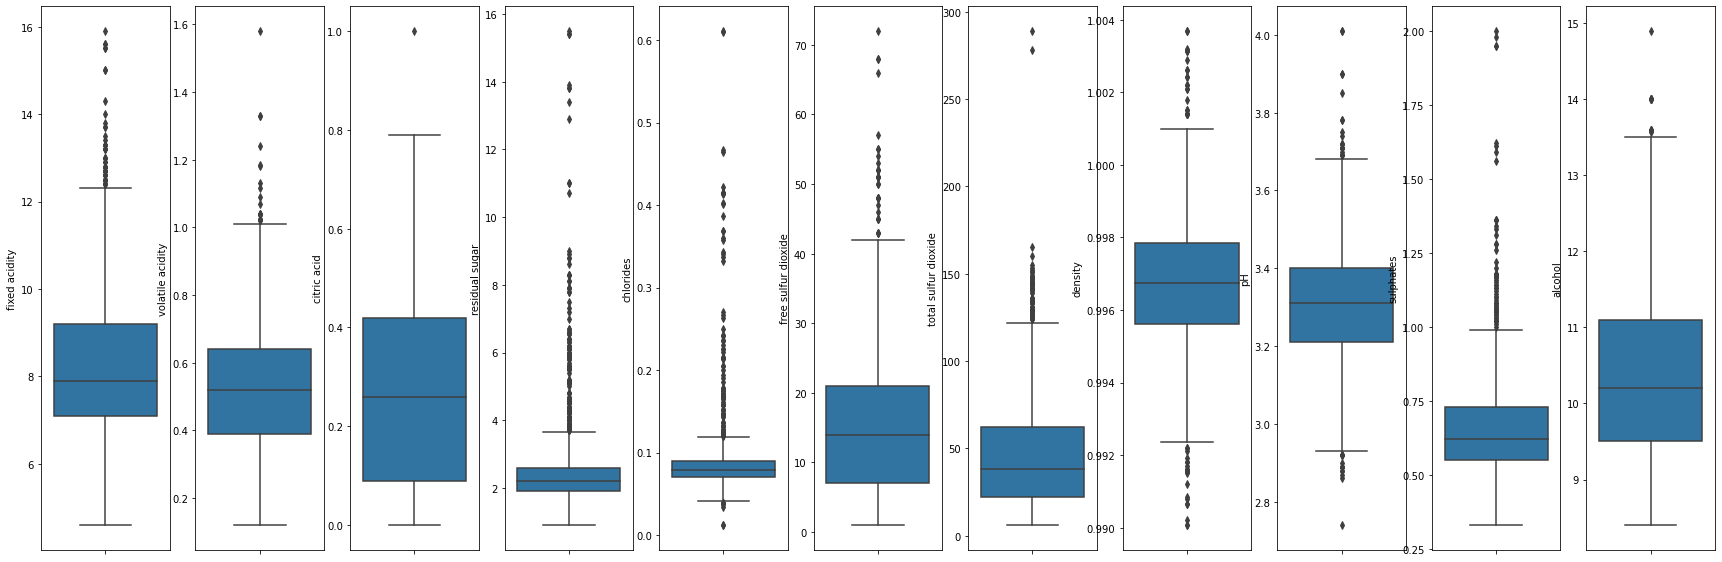

In [102]:
sns.color_palette()
plt.figure(figsize=(30, 10))
plotnumber = 1
for i in data.drop(columns=['quality', 'binary_qua']):
    plt.subplot(1,11, plotnumber)
    sns.boxplot(y=data[i], orient='v')
    plotnumber+=1

<strong>We can see that there are too many outliers in some columns, we cannot drop all the outlier values according to these. Let's look at how many rows we need to droop by using z-score.</strong>

In [104]:
X = data.drop(columns=['quality', 'binary_qua'])
print(X.shape)

(1599, 11)


In [108]:
from scipy.stats import zscore
z = np.abs(zscore(X))
print(len(np.where(z>3)[0]))

182


We need to drop 182 rows from our dataset if we go by dropping all the outliers from all columns, but first lets look at whetehr all the column variables are neccessary or not

In [110]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func=f_classif, k=11)
y = data.quality
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(11, 'Score'))

            Feature_Name       Score
10               alcohol  115.854797
1       volatile acidity   60.913993
6   total sulfur dioxide   25.478510
9              sulphates   22.273376
2            citric acid   19.690664
7                density   13.396357
0          fixed acidity    6.283081
4              chlorides    6.035639
5    free sulfur dioxide    4.754233
8                     pH    4.341764
3         residual sugar    1.053374


We can see that columns like fixed acidity, chlroides, free sulfur dioxide , pH, residual Sugar do not contribute much to the quality of the wine , so we can drop these features

In [111]:
data = data.drop(columns=['fixed acidity','chlorides', 'free sulfur dioxide', 'pH', 'residual sugar'])
data.head()

volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
0              0.70         0.00                  34.0   0.9978       0.56   
1              0.88         0.00                  67.0   0.9968       0.68   
2              0.76         0.04                  54.0   0.9970       0.65   
3              0.28         0.56                  60.0   0.9980       0.58   
4              0.70         0.00                  34.0   0.9978       0.56   

   alcohol  quality  binary_qua  
0      9.4        5           0  
1      9.8        5           0  
2      9.8        5           0  
3      9.8        6           1  
4      9.4        5           0

<strong>We now have less columns to make our prediction, which is good as it will cost less to build our model.</strong>

<h3>Lets Check for outliers Again</h3>

In [112]:
X = data.drop(columns=['quality', 'binary_qua'])
print(X.shape)

(1599, 6)


In [113]:
from scipy.stats import zscore
z = np.abs(zscore(X))
print(len(np.where(z>3)[0]))

79


We now have to drop only 79 values from our dataset

<h3>Boxplots</h3>

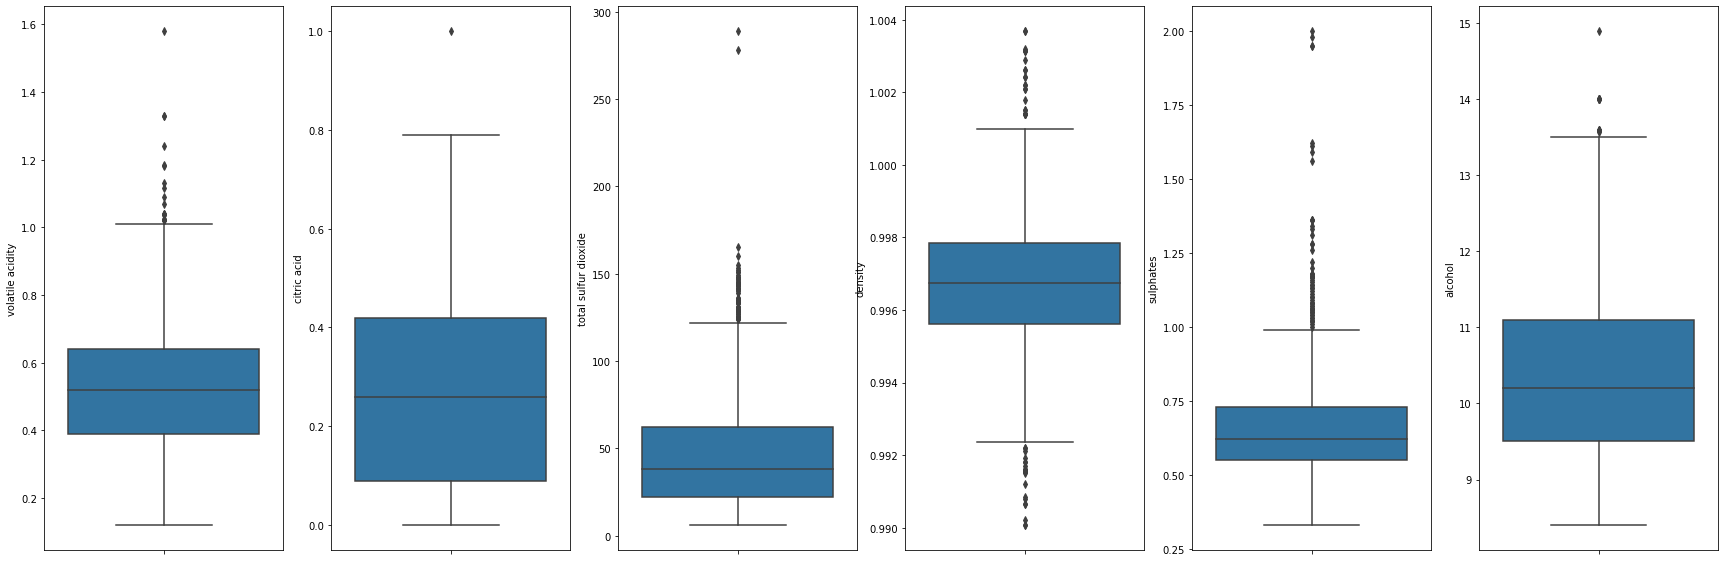

In [115]:
plt.figure(figsize=(30, 10))
plotnumber = 1
for i in data.drop(columns=['quality', 'binary_qua']):
    plt.subplot(1,6, plotnumber)
    sns.boxplot(y=data[i], orient='v')
    plotnumber+=1

<strong>Density, total sulfur dioxide and sulfates have more number of outliers</strong>

<h3>Skewness</h3>

In [117]:
data.skew()

volatile acidity        0.671593
citric acid             0.318337
total sulfur dioxide    1.515531
density                 0.071288
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
binary_qua             -0.139303
dtype: float64

<strong>Volatile Acidity, total sulfur dioxide , sulphates and alcohol are more skewed</strong>

<h3>Distribution Plots</h3>

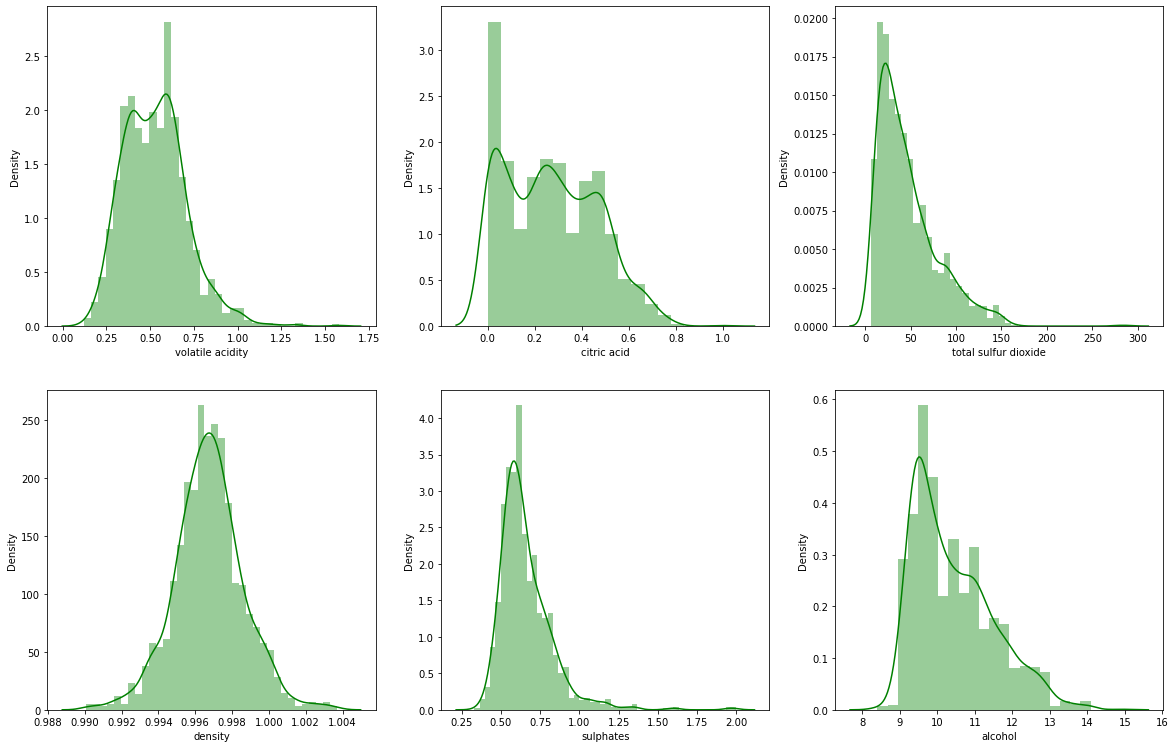

In [119]:
plt.figure(figsize=(20,20))
plotnumber = 1
for col in data.drop(columns=['quality', 'binary_qua']).columns.values:
    plt.subplot(3,3, plotnumber)
    sns.distplot(data[col], color='green')
    plotnumber+=1

<strong>Above plots confirm our interpretations about the skew of the columns</strong>

Removing Outliers

In [120]:
data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])

Old Shape (1599, 8)
New Shape (1524, 8)
Total Dropped Rows 75


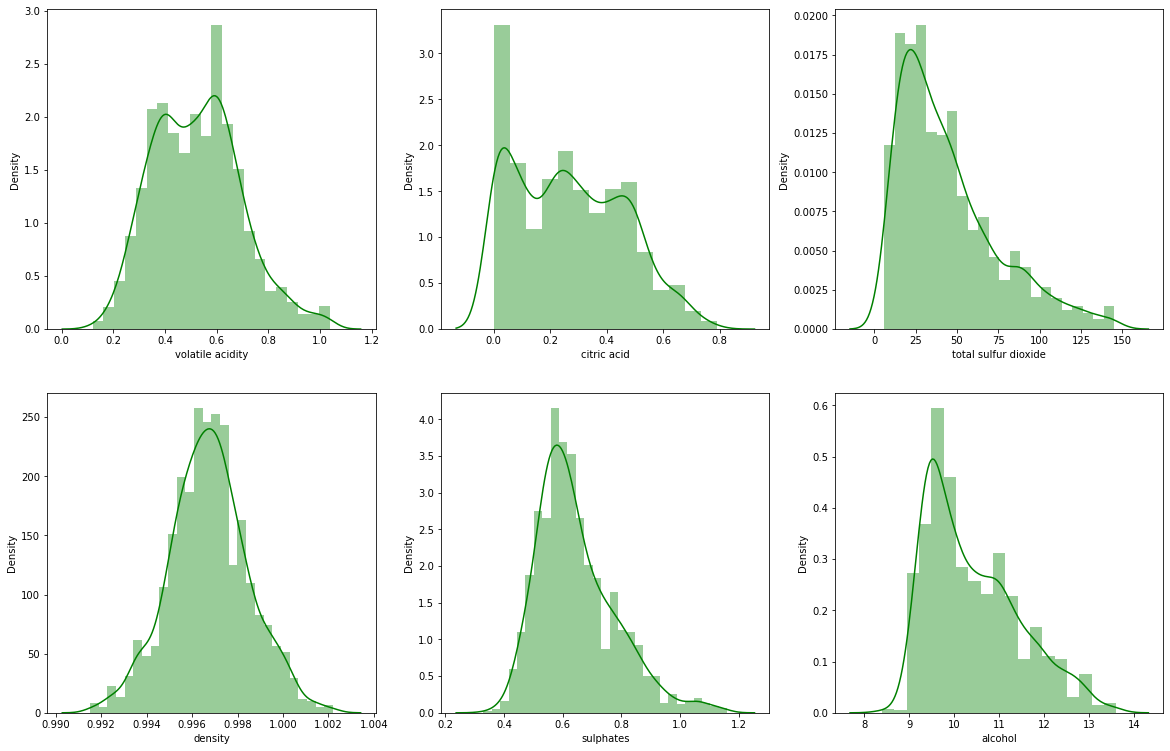

In [122]:
plt.figure(figsize=(20,20))
plotnumber = 1
for col in data_new.drop(columns=['quality', 'binary_qua']).columns.values:
    plt.subplot(3,3, plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

<strong>We have managed to remove the skew a little bit, further more will be done by using transformations</strong>

In [125]:
X = data_new.drop(columns=['quality', 'binary_qua'])
y_q = data_new.quality
y_b = data_new.binary_qua

In [126]:
X.skew()

volatile acidity        0.365902
citric acid             0.306654
total sulfur dioxide    1.143523
density                 0.063909
sulphates               0.948565
alcohol                 0.760804
dtype: float64

<h3>Square Root Transformation</h3>

In [127]:
X_root = np.sqrt(X)
X_root.skew()

volatile acidity       -0.058851
citric acid            -0.519248
total sulfur dioxide    0.532636
density                 0.061047
sulphates               0.665383
alcohol                 0.675703
dtype: float64

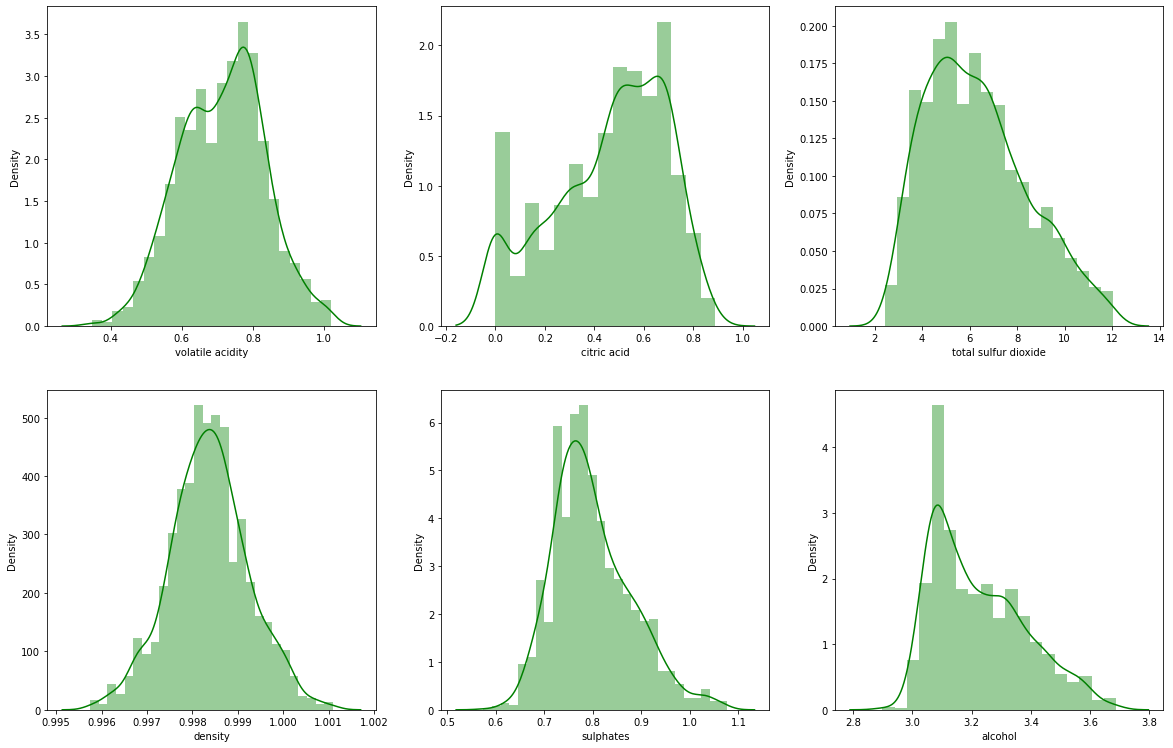

In [133]:
plt.figure(figsize=(20,20))
plotnumber = 1
for col in X_root:
    plt.subplot(3,3, plotnumber)
    sns.distplot(X_root[col], color='green')
    plotnumber+=1

<h3>Log Transformation</h3>

In [128]:
X_log = np.log1p(X)
X_log.skew()

volatile acidity        0.087430
citric acid             0.091480
total sulfur dioxide   -0.068528
density                 0.061052
sulphates               0.717516
alcohol                 0.606936
dtype: float64

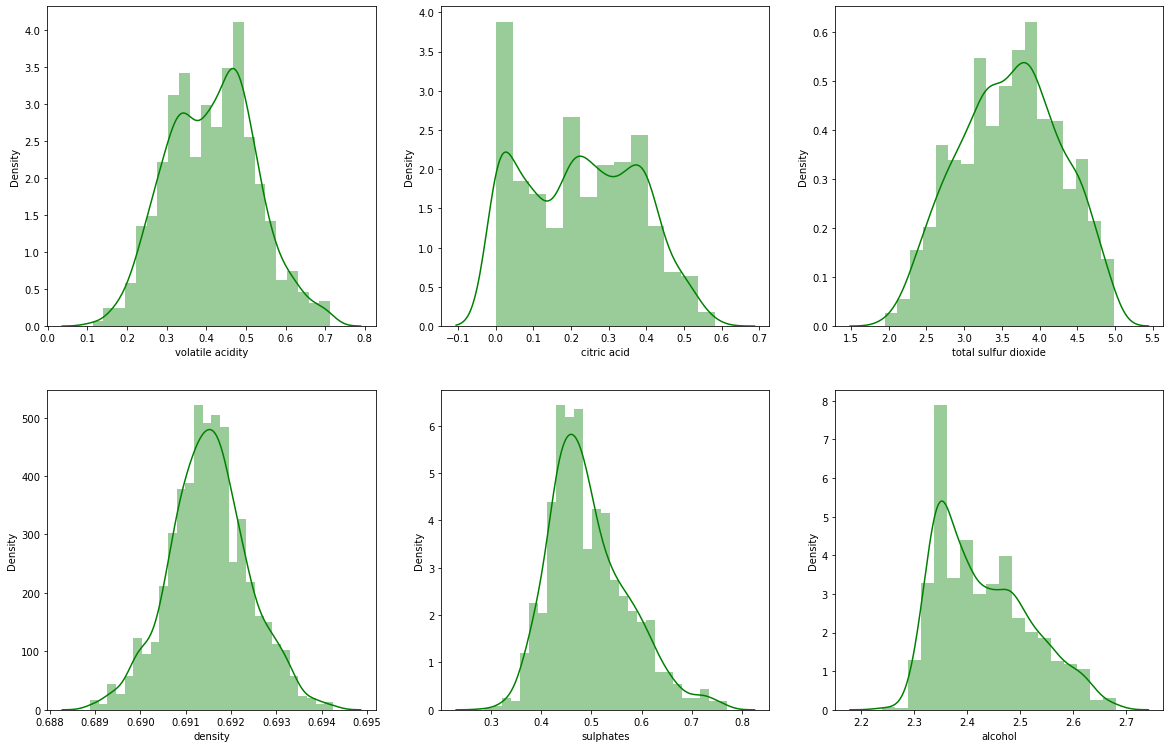

In [134]:
plt.figure(figsize=(20,20))
plotnumber = 1
for col in X_log:
    plt.subplot(3,3, plotnumber)
    sns.distplot(X_log[col], color='green')
    plotnumber+=1

<h3>Yeo-Johnson Transformation</h3>

In [132]:
from sklearn.preprocessing import power_transform
X_power = power_transform(X, method='yeo-johnson')
X_power = pd.DataFrame(X_power, columns=X.columns)
X_power.skew()

volatile acidity        0.004306
citric acid             0.019952
total sulfur dioxide   -0.007940
density                 0.000000
sulphates               0.025101
alcohol                 0.108783
dtype: float64

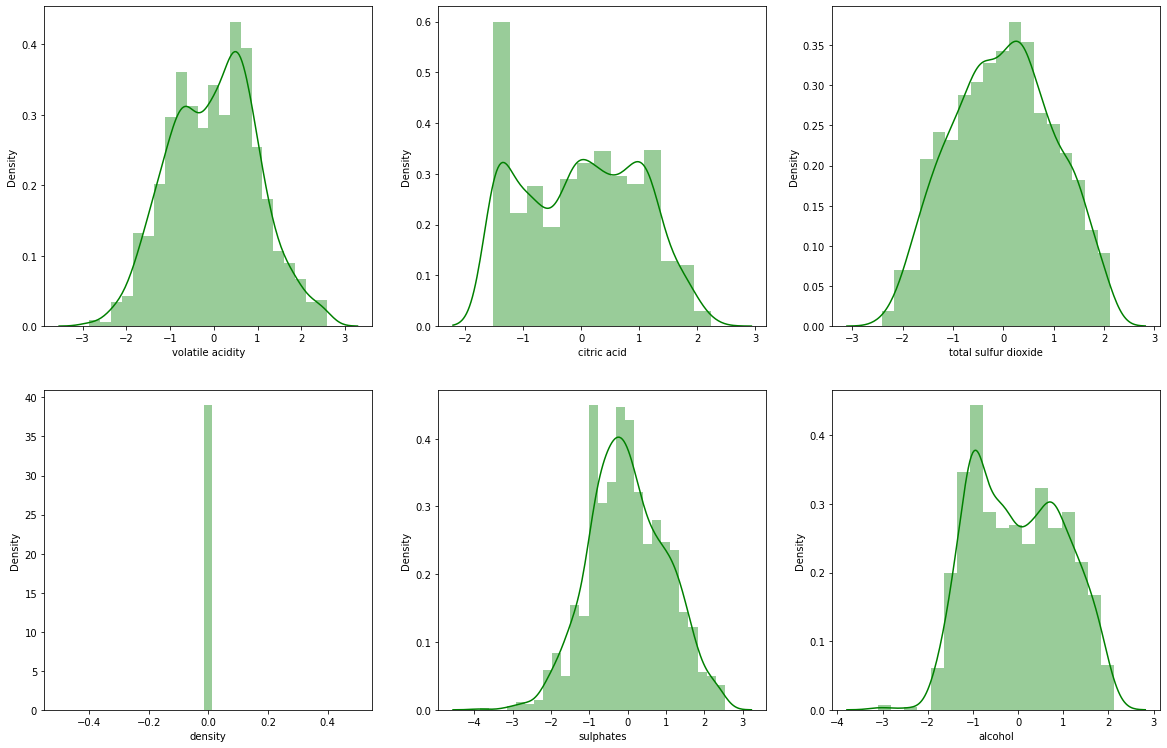

In [135]:
plt.figure(figsize=(20,20))
plotnumber = 1
for col in X_power:
    plt.subplot(3,3, plotnumber)
    sns.distplot(X_power[col], color='green')
    plotnumber+=1

<strong>Power Transformation Does the best job in removing skew of all columns. What Power Transformation has done is made all values of density to zero, so we are gonna assign back to its original values as it already had very less skew</strong>

In [138]:
X_power['density']=X['density']
X_power.skew()

volatile acidity        0.004306
citric acid             0.019952
total sulfur dioxide   -0.007940
density                 0.019840
sulphates               0.025101
alcohol                 0.108783
dtype: float64

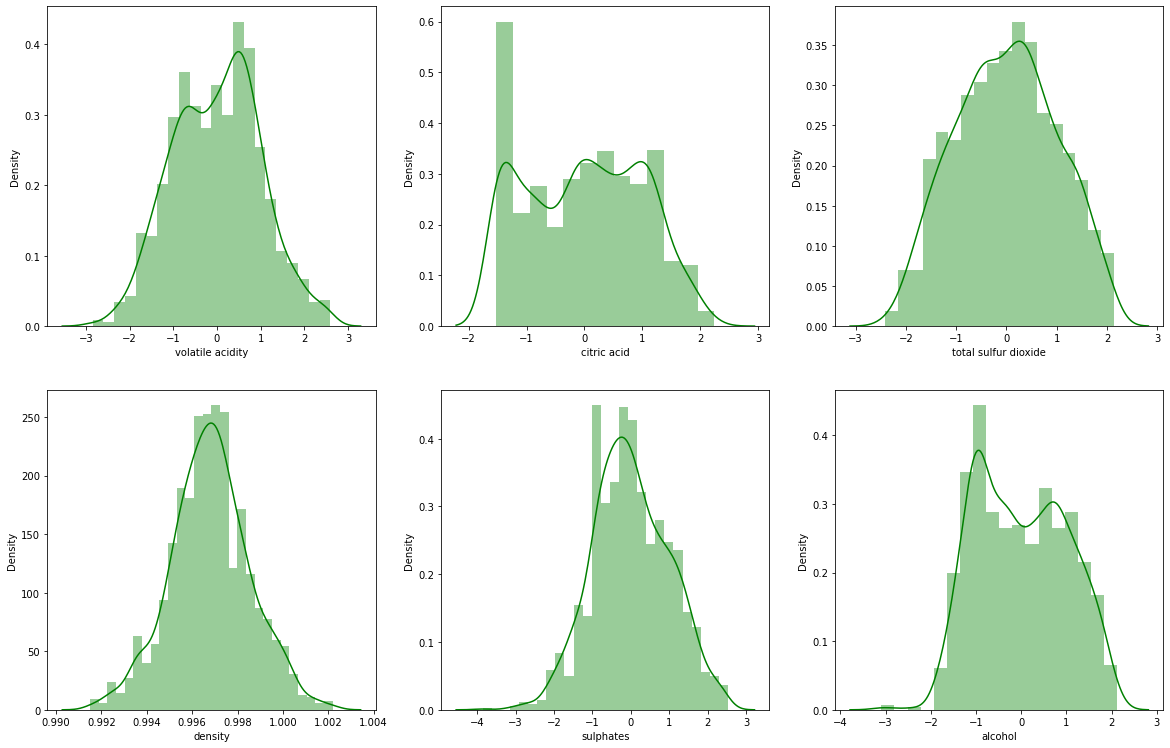

In [139]:
plt.figure(figsize=(20,20))
plotnumber = 1
for col in X_power:
    plt.subplot(3,3, plotnumber)
    sns.distplot(X_power[col], color='green')
    plotnumber+=1

<h3>Scaling the dataset</h3>

In [142]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_scaled=sc.fit_transform(X)
X_scaled =pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.mean()

volatile acidity       -9.616105e-18
citric acid            -5.857082e-17
total sulfur dioxide    2.404117e-16
density                 2.063572e-14
sulphates              -5.713205e-17
alcohol                -1.128872e-15
dtype: float64

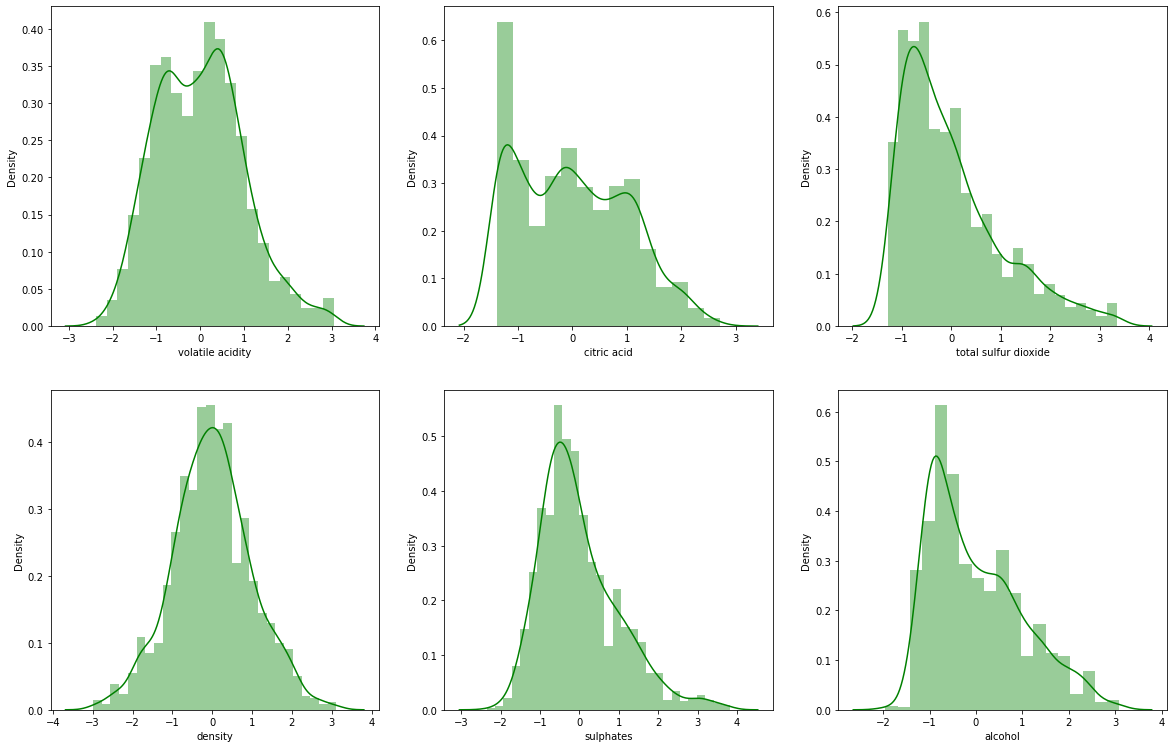

In [143]:
plt.figure(figsize=(20,20))
plotnumber = 1
for col in X_scaled:
    plt.subplot(3,3, plotnumber)
    sns.distplot(X_scaled[col], color='green')
    plotnumber+=1

<strong>Now, we have all our variables brought down to same scale</strong>

<h3>Reducing Multicollinearity</h3>

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X_scaled.columns
vif

vif              Features
0  1.775931      volatile acidity
1  2.191807           citric acid
2  1.084338  total sulfur dioxide
3  1.947933               density
4  1.237034             sulphates
5  1.712410               alcohol

<strong>As no VIF value is above 5, there is no multicollinearity</strong>

<h3>Building Models</h3>

In [146]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

In [153]:
X_train_qua, X_test_qua, Y_train_qua, Y_test_qua = train_test_split(X_scaled, y_q, test_size=0.25)

In [154]:
print("Trainig : ",X_train_qua.shape[0])
print("Testing : ", X_test_qua.shape[0])

Trainig :  1143
Testing :  381


In [155]:
X_train_bq, X_test_bq, Y_train_bq, Y_test_bq = train_test_split(X_scaled, y_b, test_size=0.25)

In [156]:
print("Trainig : ",X_train_bq.shape[0])
print("Testing : ", X_test_bq.shape[0])

Trainig :  1143
Testing :  381


<h3>Logistic Regression on Quality</h3>

In [217]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [218]:
lr.fit(X_train_qua, Y_train_qua)

LogisticRegression()

In [219]:
y_pred_train_qua_lr = lr.predict(X_train_qua)
y_pred_test_qua_lr = lr.predict(X_test_qua)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_qua_lr, Y_train_qua))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_qua_lr, Y_test_qua))

Training Accuracy on Qualtiy :  0.6019247594050744
Testing Accuracy on Quality : 0.5931758530183727


In [220]:
print(classification_report(y_pred_test_qua_lr, Y_test_qua))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.76      0.60      0.67       180
           6       0.62      0.58      0.60       178
           7       0.27      0.61      0.38        23
           8       0.00      0.00      0.00         0

    accuracy                           0.59       381
   macro avg       0.27      0.30      0.27       381
weighted avg       0.66      0.59      0.62       381



In [221]:
from sklearn.metrics import confusion_matrix

Text(69.0, 0.5, 'Predicted')

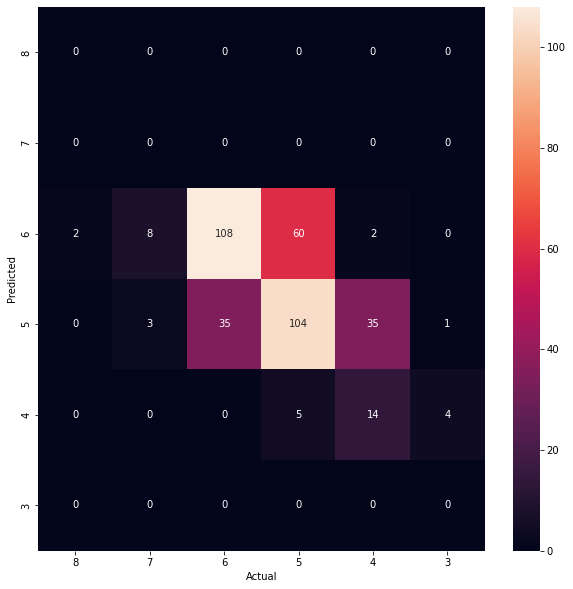

In [222]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_pred_test_qua_lr, Y_test_qua), annot=True, xticklabels=[8,7,6,5,4,3], yticklabels=[8,7,6,5,4,3], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>ROC Curves cannot be plotted for more than 2 classes</strong>

<h4>Treating Above model as baseline, lets tune the hyperparameteres</h4>

In [223]:
lr = LogisticRegression()

In [224]:
grid_param = {
    'penalty':['l1'],
    'dual':[True, False],
    'max_iter':np.arange(100, 4000, 200),
    'fit_intercept':[True, False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

grid_lr = GridSearchCV(lr, param_grid=grid_param,n_jobs=-1, scoring='accuracy', cv=4)
grid_lr.fit(X_train_qua, Y_train_qua)

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': array([ 100,  300,  500,  700,  900, 1100, 1300, 1500, 1700, 1900, 2100,
       2300, 2500, 2700, 2900, 3100, 3300, 3500, 3700, 3900]),
                         'penalty': ['l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [225]:
grid_lr.best_params_

{'dual': False,
 'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'saga'}

In [226]:
grid_lr.best_score_

0.5975647159857687

BuldingM Model with best Params

In [227]:
lrcvq = LogisticRegression(penalty='l1',solver='saga')
lrcvq.fit(X_train_qua, Y_train_qua)

LogisticRegression(penalty='l1', solver='saga')

In [228]:
y_pred_train_qua_lrcv = lrcvq.predict(X_train_qua)

y_pred_test_qua_lrcv = lrcvq.predict(X_test_qua)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_qua_lrcv, Y_train_qua))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_qua_lrcv, Y_test_qua))

Training Accuracy on Qualtiy :  0.6045494313210849
Testing Accuracy on Quality : 0.5931758530183727


In [229]:
print(classification_report(y_pred_test_qua_lrcv, Y_test_qua))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.76      0.60      0.67       179
           6       0.62      0.58      0.60       178
           7       0.27      0.61      0.38        23
           8       0.00      0.00      0.00         0

    accuracy                           0.59       381
   macro avg       0.27      0.30      0.27       381
weighted avg       0.66      0.59      0.62       381



Text(69.0, 0.5, 'Predicted')

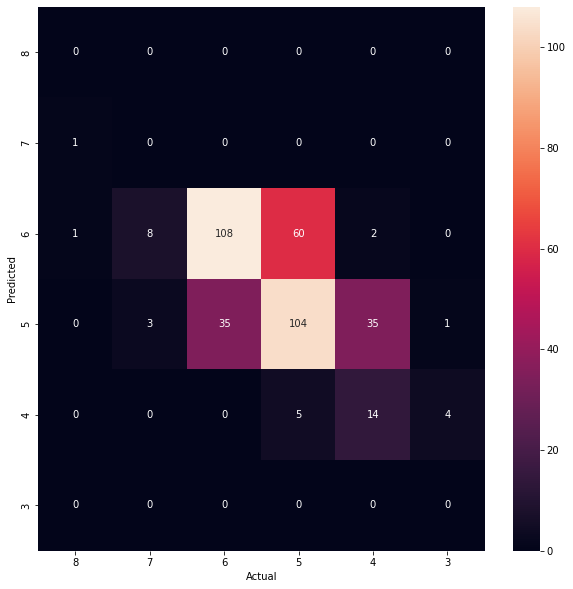

In [230]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_pred_test_qua_lrcv, Y_test_qua), annot=True, xticklabels=[8,7,6,5,4,3], yticklabels=[8,7,6,5,4,3], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h3>Logistic Regression on Binary Quality</h3>

Training Accuracy on Qualtiy :  0.7419072615923009
Testing Accuracy on Quality : 0.7427821522309711
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       179
           1       0.76      0.76      0.76       202

    accuracy                           0.74       381
   macro avg       0.74      0.74      0.74       381
weighted avg       0.74      0.74      0.74       381



Text(24.0, 0.5, 'Predicted')

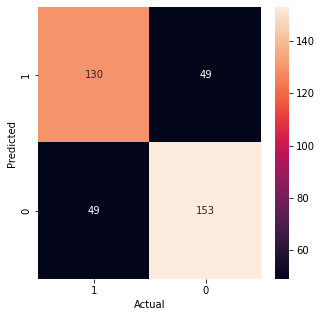

In [231]:
lr = LogisticRegression()
lr.fit(X_train_bq, Y_train_bq)

y_pred_train_bq_lr = lr.predict(X_train_bq)

y_pred_test_bq_lr = lr.predict(X_test_bq)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_bq_lr, Y_train_bq))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_bq_lr, Y_test_bq))

print(classification_report(y_pred_test_bq_lr, Y_test_bq))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_test_bq_lr, Y_test_bq), annot=True, xticklabels=[1,0], yticklabels=[1,0], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Treating Above model as baseline, lets tune the hyperparameteres</h4>

In [232]:
lr = LogisticRegression()

grid_param = {
    'penalty':['l1'],
    'dual':[True, False],
    'max_iter':np.arange(100, 4000, 200),
    'fit_intercept':[True, False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

grid_lr = GridSearchCV(lr, param_grid=grid_param,n_jobs=-1, scoring='accuracy', cv=4)
grid_lr.fit(X_train_bq, Y_train_bq)

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': array([ 100,  300,  500,  700,  900, 1100, 1300, 1500, 1700, 1900, 2100,
       2300, 2500, 2700, 2900, 3100, 3300, 3500, 3700, 3900]),
                         'penalty': ['l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [233]:
grid_lr.best_params_

{'dual': False,
 'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'saga'}

In [234]:
grid_lr.best_score_

0.743617347564716

Training Accuracy on Qualtiy :  0.7410323709536308
Testing Accuracy on Quality : 0.7427821522309711
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       179
           1       0.76      0.76      0.76       202

    accuracy                           0.74       381
   macro avg       0.74      0.74      0.74       381
weighted avg       0.74      0.74      0.74       381



Text(24.0, 0.5, 'Predicted')

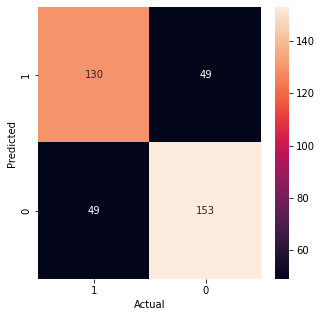

In [235]:
lrcvbq = LogisticRegression(penalty='l1',solver='saga')
lrcvbq.fit(X_train_bq, Y_train_bq)

y_pred_train_bq_lrcv = lrcvbq.predict(X_train_bq)

y_pred_test_bq_lrcv = lrcvbq.predict(X_test_bq)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_bq_lrcv, Y_train_bq))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_bq_lrcv, Y_test_bq))

print(classification_report(y_pred_test_bq_lrcv, Y_test_bq))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_test_bq_lrcv, Y_test_bq), annot=True, xticklabels=[1,0], yticklabels=[1,0], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [237]:
fprlr, tprlr, thresholdslr = roc_curve(Y_test_bq, y_pred_test_bq_lrcv)
print('Threshold =', thresholdslr)
print('True Positive Rate =', tprlr)
print('False Positive Rate =', fprlr)

Threshold = [2 1 0]
True Positive Rate = [0.         0.75742574 1.        ]
False Positive Rate = [0.         0.27374302 1.        ]


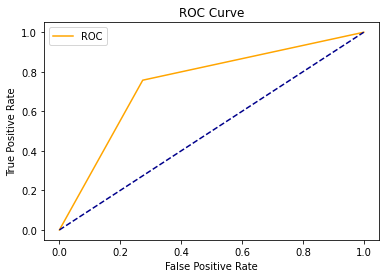

In [238]:
plt.plot(fprlr, tprlr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [286]:
auc_scorelr = roc_auc_score(Y_test_bq, y_pred_test_bq_lrcv)
auc_scorelr

0.7418413629072405

<strong>our model has an AUC Score of 0.741. Let's Build a few more models to try and improve this</strong>

<h3>KNeighborsClassifier on Quality</h3>

In [241]:
from sklearn.neighbors import KNeighborsClassifier

In [242]:
knn = KNeighborsClassifier()
knn.fit(X_train_qua, Y_train_qua)

y_pred_train_qua_knn = knn.predict(X_train_qua)
y_pred_test_qua_knn = knn.predict(X_test_qua)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_qua_knn, Y_train_qua))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_qua_knn, Y_test_qua))

print("Classification Report")
print(classification_report(y_pred_test_qua_knn, Y_test_qua))

Training Accuracy on Qualtiy :  0.7244094488188977
Testing Accuracy on Quality : 0.5826771653543307
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.73      0.58      0.65       181
           6       0.59      0.60      0.60       167
           7       0.33      0.61      0.43        28
           8       0.00      0.00      0.00         1

    accuracy                           0.58       381
   macro avg       0.28      0.30      0.28       381
weighted avg       0.63      0.58      0.60       381



Text(69.0, 0.5, 'Predicted')

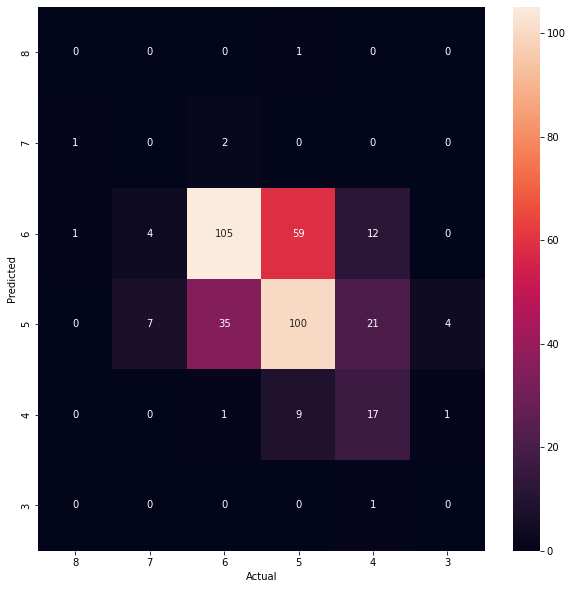

In [243]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_pred_test_qua_knn, Y_test_qua), annot=True, xticklabels=[8,7,6,5,4,3], yticklabels=[8,7,6,5,4,3], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Treating Above model as baseline, lets tune the hyperparameteres</h4>

In [244]:
knn = KNeighborsClassifier()

In [249]:
grid_param = {
    'n_neighbors':[13,15,17,19,21,23],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[17,21,25,29,33,37,41],
    'p':[1,2,3],
    'n_jobs':[-1]
}

grid_knn = GridSearchCV(knn, param_grid=grid_param, n_jobs=-1, cv=3)
grid_knn.fit(X_train_qua, Y_train_qua)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [17, 21, 25, 29, 33, 37, 41],
                         'n_jobs': [-1],
                         'n_neighbors': [13, 15, 17, 19, 21, 23],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [250]:
grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 17,
 'n_jobs': -1,
 'n_neighbors': 21,
 'p': 3,
 'weights': 'distance'}

In [251]:
grid_knn.best_score_

0.6500437445319335

<h4>Building Model with best Params</h4>

In [275]:
knncv = KNeighborsClassifier(algorithm='auto', n_jobs=-1, n_neighbors=21, p=3, weights='distance', leaf_size=17)

In [276]:
knncv.fit(X_train_qua, Y_train_qua)

KNeighborsClassifier(leaf_size=17, n_jobs=-1, n_neighbors=21, p=3,
                     weights='distance')

In [277]:
y_pred_train_qua_knncv = knncv.predict(X_train_qua)
y_pred_test_qua_knncv = knncv.predict(X_test_qua)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_qua_knncv, Y_train_qua))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_qua_knncv, Y_test_qua))

print("Classification Report")
print(classification_report(y_pred_test_qua_knncv, Y_test_qua))

Training Accuracy on Qualtiy :  1.0
Testing Accuracy on Quality : 0.6666666666666666
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.78      0.68      0.73       163
           6       0.70      0.65      0.67       182
           7       0.49      0.69      0.57        36
           8       0.00      0.00      0.00         0

    accuracy                           0.67       381
   macro avg       0.33      0.34      0.33       381
weighted avg       0.71      0.67      0.69       381



Text(69.0, 0.5, 'Predicted')

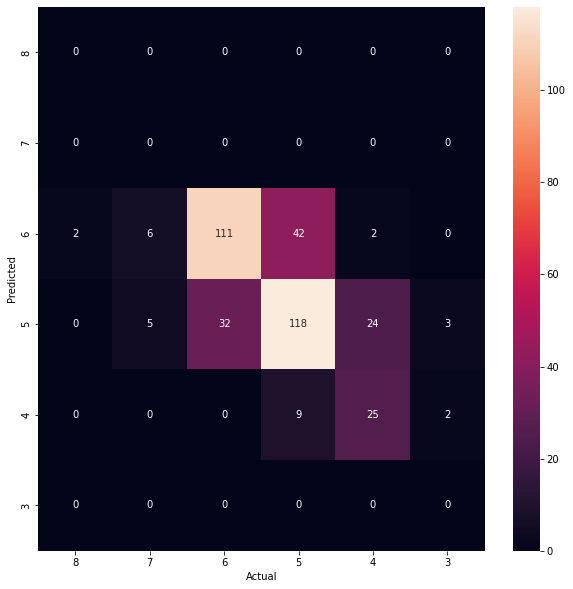

In [278]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_pred_test_qua_knncv, Y_test_qua), annot=True, xticklabels=[8,7,6,5,4,3], yticklabels=[8,7,6,5,4,3], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>This model does well than LogisticRegression, but this is probably overfitting</strong>

<h3>KNeighborsClasifier on Binary Quality</h3>

Training Accuracy on Qualtiy :  0.8293963254593176
Testing Accuracy on Quality : 0.7191601049868767
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       170
           1       0.76      0.73      0.74       211

    accuracy                           0.72       381
   macro avg       0.72      0.72      0.72       381
weighted avg       0.72      0.72      0.72       381



Text(24.0, 0.5, 'Predicted')

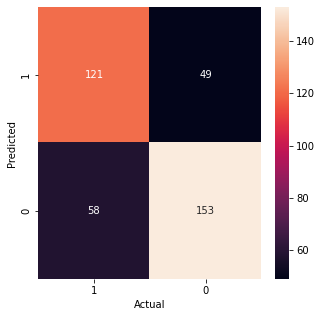

In [279]:
knn = KNeighborsClassifier()

knn.fit(X_train_bq, Y_train_bq)

y_pred_train_bq_knn = knn.predict(X_train_bq)

y_pred_test_bq_knn = knn.predict(X_test_bq)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_bq_knn, Y_train_bq))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_bq_knn, Y_test_bq))
print("Classification Report")
print(classification_report(y_pred_test_bq_knn, Y_test_bq))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_test_bq_knn, Y_test_bq), annot=True, xticklabels=[1,0], yticklabels=[1,0], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Treating Above model as baseline, lets tune the hyperparameteres</h4>

In [280]:
knn =KNeighborsClassifier()

grid_param = {
    'n_neighbors':[13,15,17,19,21,23],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[17,21,25,29,33,37,41],
    'p':[1,2,3],
    'n_jobs':[-1]
}

grid_knnbq = GridSearchCV(knn, param_grid=grid_param, n_jobs=-1, cv=3)
grid_knnbq.fit(X_train_bq, Y_train_bq)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [17, 21, 25, 29, 33, 37, 41],
                         'n_jobs': [-1],
                         'n_neighbors': [13, 15, 17, 19, 21, 23],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [281]:
grid_knnbq.best_params_

{'algorithm': 'auto',
 'leaf_size': 17,
 'n_jobs': -1,
 'n_neighbors': 23,
 'p': 1,
 'weights': 'distance'}

In [282]:
grid_knnbq.best_score_

0.7821522309711287

<h4>Builiding Model with best Params</h4>

Training Accuracy on Qualtiy :  1.0
Testing Accuracy on Quality : 0.7979002624671916
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       172
           1       0.83      0.80      0.81       209

    accuracy                           0.80       381
   macro avg       0.80      0.80      0.80       381
weighted avg       0.80      0.80      0.80       381



Text(24.0, 0.5, 'Predicted')

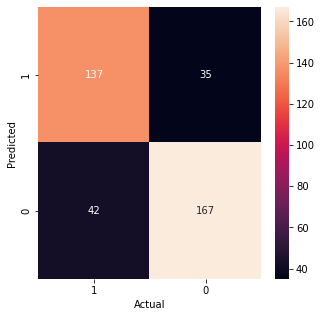

In [283]:
knnbqcv = KNeighborsClassifier(n_neighbors=23, p=1, weights='distance', n_jobs=-1, leaf_size=17)
knnbqcv.fit(X_train_bq, Y_train_bq)

y_pred_train_bq_knncv = knnbqcv.predict(X_train_bq)

y_pred_test_bq_knncv = knnbqcv.predict(X_test_bq)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_bq_knncv, Y_train_bq))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_bq_knncv, Y_test_bq))
print("Classification Report")
print(classification_report(y_pred_test_bq_knncv, Y_test_bq))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_test_bq_knncv, Y_test_bq), annot=True, xticklabels=[1,0], yticklabels=[1,0], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [284]:
fprknn, tprknn, thresholdsknn = roc_curve(Y_test_bq, y_pred_test_bq_knncv)
print('Threshold =', thresholdsknn)
print('True Positive Rate =', tprknn)
print('False Positive Rate =', fprknn)

Threshold = [2 1 0]
True Positive Rate = [0.         0.82673267 1.        ]
False Positive Rate = [0.         0.23463687 1.        ]


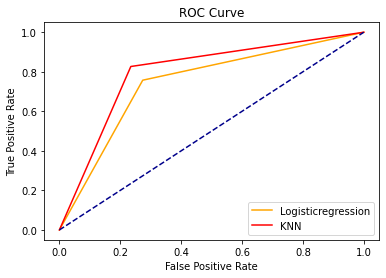

In [285]:
plt.plot(fprlr, tprlr, color='orange', label='Logisticregression')
plt.plot(fprknn, tprknn, color='red', label='KNN')
plt.plot([0,1], [0,1], color='darkblue', ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [287]:
auc_scoreknn = roc_auc_score(Y_test_bq, y_pred_test_bq_knncv)
auc_scoreknn

0.7960479008794734

<strong>KNN performs better than LogisticRegression which can be seen from both ROC Curve and AUC Score, but it has a slight chance of overfitting</strong>

<h3>Decison Tree Classifier on  Quality</h3>

In [288]:
from sklearn.tree import DecisionTreeClassifier

In [290]:
dt = DecisionTreeClassifier()

dt.fit(X_train_qua, Y_train_qua)
y_pred_train_qua_dt = dt.predict(X_train_qua)
y_pred_test_qua_dt = dt.predict(X_test_qua)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_qua_dt, Y_train_qua))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_qua_dt, Y_test_qua))

print("Classification Report")
print(classification_report(y_pred_test_qua_dt, Y_test_qua))

Training Accuracy on Qualtiy :  1.0
Testing Accuracy on Quality : 0.6167979002624672
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.09      0.08      0.09        12
           5       0.72      0.63      0.67       164
           6       0.60      0.66      0.63       153
           7       0.57      0.64      0.60        45
           8       0.20      0.25      0.22         4

    accuracy                           0.62       381
   macro avg       0.36      0.38      0.37       381
weighted avg       0.62      0.62      0.62       381



Text(69.0, 0.5, 'Predicted')

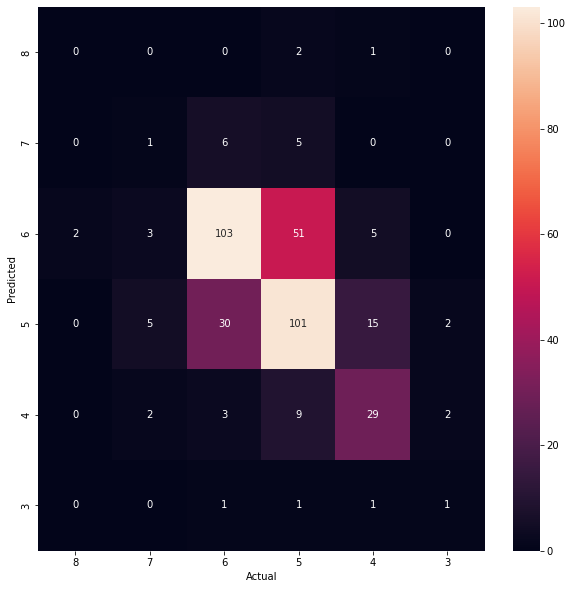

In [291]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_pred_test_qua_dt, Y_test_qua), annot=True, xticklabels=[8,7,6,5,4,3], yticklabels=[8,7,6,5,4,3], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Treating Above model as baseline, lets tune the hyperparameteres</h4>

In [302]:
dt = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[5,6,7,8,9,10,11,12,13,14],
    'min_samples_split':[2,3,4,5,6,7],
    'min_samples_leaf':[3,4,5,6,7,8],
    'max_leaf_nodes':[10,20,25,30,35,40,45,50,60,70,80]
}

grid_dt = GridSearchCV(dt, param_grid=grid_param, cv=3, n_jobs=-1)
grid_dt.fit(X_train_qua, Y_train_qua)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_leaf_nodes': [10, 20, 25, 30, 35, 40, 45, 50, 60,
                                            70, 80],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']})

In [303]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'splitter': 'random'}

In [304]:
grid_dt.best_score_

0.6106736657917761

<h4>Building Model with best Params</h4>

In [305]:
dfcv = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=6, min_samples_split=3)
dfcv.fit(X_train_qua, Y_train_qua)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=3)

In [306]:
y_pred_train_qua_dtcv = dfcv.predict(X_train_qua)
y_pred_test_qua_dtcv = dfcv.predict(X_test_qua)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_qua_dtcv, Y_train_qua))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_qua_dtcv, Y_test_qua))

print("Classification Report")
print(classification_report(y_pred_test_qua_dtcv, Y_test_qua))

Training Accuracy on Qualtiy :  0.7226596675415573
Testing Accuracy on Quality : 0.5984251968503937
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         7
           5       0.74      0.61      0.67       173
           6       0.62      0.61      0.62       172
           7       0.33      0.59      0.42        29
           8       0.00      0.00      0.00         0

    accuracy                           0.60       381
   macro avg       0.28      0.30      0.29       381
weighted avg       0.64      0.60      0.61       381



Text(69.0, 0.5, 'Predicted')

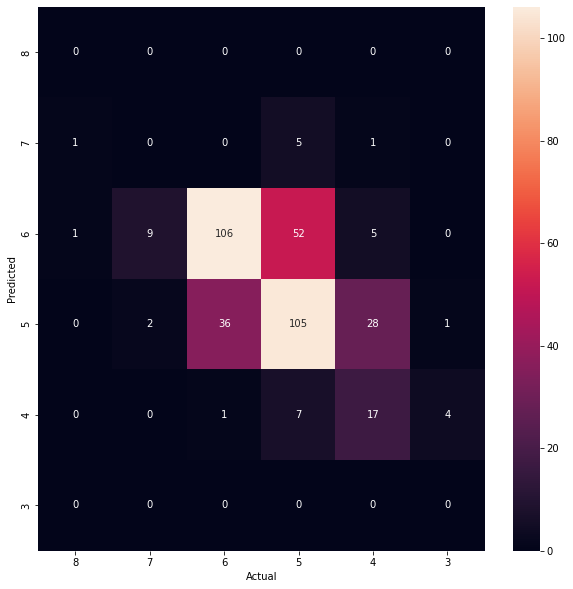

In [307]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_pred_test_qua_dtcv, Y_test_qua), annot=True, xticklabels=[8,7,6,5,4,3], yticklabels=[8,7,6,5,4,3], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>KNN was doing better than this model on testing datset, but it was slightly overfitting on training dataset. There is no overfitting problem in DecisionTree</strong>

<h3>DecisionTreeClassifier on Binary Quality</h3>

Training Accuracy on Qualtiy :  1.0
Testing Accuracy on Quality : 0.7375328083989501
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       177
           1       0.76      0.75      0.75       204

    accuracy                           0.74       381
   macro avg       0.74      0.74      0.74       381
weighted avg       0.74      0.74      0.74       381



Text(24.0, 0.5, 'Predicted')

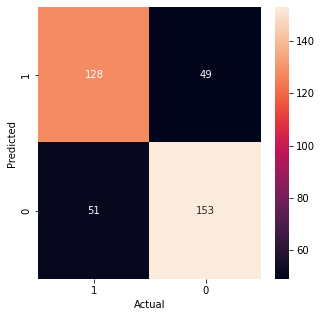

In [308]:
dt = DecisionTreeClassifier()
dt.fit(X_train_bq, Y_train_bq)

y_pred_train_bq_dt = dt.predict(X_train_bq)

y_pred_test_bq_dt = dt.predict(X_test_bq)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_bq_dt, Y_train_bq))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_bq_dt, Y_test_bq))
print("Classification Report")
print(classification_report(y_pred_test_bq_dt, Y_test_bq))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_test_bq_dt, Y_test_bq), annot=True, xticklabels=[1,0], yticklabels=[1,0], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Treating this as base model, let's tune the Hyperparametrs</h4>

In [309]:
dt = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[5,6,7,8,9,10,11,12,13,14],
    'min_samples_split':[2,3,4,5,6,7],
    'min_samples_leaf':[3,4,5,6,7,8],
    'max_leaf_nodes':[10,20,25,30,35,40,45,50,60,70,80]
}

grid_dtbq = GridSearchCV(dt, param_grid=grid_param, cv=3, n_jobs=-1)
grid_dtbq.fit(X_train_bq, Y_train_bq)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_leaf_nodes': [10, 20, 25, 30, 35, 40, 45, 50, 60,
                                            70, 80],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']})

In [310]:
grid_dtbq.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'random'}

In [311]:
grid_dtbq.best_score_

0.7550306211723535

<h4>Building Model with best params</h4>

Training Accuracy on Qualtiy :  0.8941382327209099
Testing Accuracy on Quality : 0.7611548556430446
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       172
           1       0.79      0.77      0.78       209

    accuracy                           0.76       381
   macro avg       0.76      0.76      0.76       381
weighted avg       0.76      0.76      0.76       381



Text(24.0, 0.5, 'Predicted')

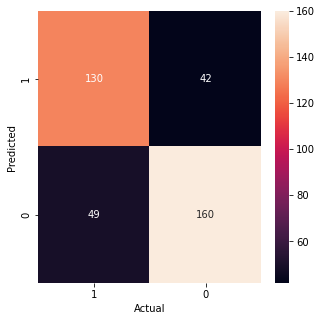

In [353]:
dtcv =DecisionTreeClassifier(criterion='gini', max_depth=13, max_leaf_nodes=70, min_samples_leaf=3, min_samples_split=4, splitter='best')
dtcv.fit(X_train_bq, Y_train_bq)
y_pred_train_bq_dtcv = dtcv.predict(X_train_bq)

y_pred_test_bq_dtcv = dtcv.predict(X_test_bq)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_bq_dtcv, Y_train_bq))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_bq_dtcv, Y_test_bq))
print("Classification Report")
print(classification_report(y_pred_test_bq_dtcv, Y_test_bq))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_test_bq_dtcv, Y_test_bq), annot=True, xticklabels=[1,0], yticklabels=[1,0], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [354]:
fprdt, tprdt, thresholdsdt = roc_curve(Y_test_bq, y_pred_test_bq_dtcv)
print('Threshold =', thresholdsdt)
print('True Positive Rate =', tprdt)
print('False Positive Rate =', fprdt)

Threshold = [2 1 0]
True Positive Rate = [0.         0.79207921 1.        ]
False Positive Rate = [0.         0.27374302 1.        ]


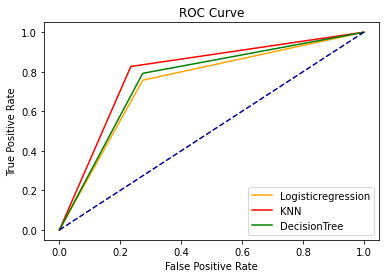

In [355]:
plt.plot(fprlr, tprlr, color='orange', label='Logisticregression')
plt.plot(fprknn, tprknn, color='red', label='KNN')
plt.plot(fprdt, tprdt, color='green', label='DecisionTree')
plt.plot([0,1], [0,1], color='darkblue', ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [356]:
auc_scoredt = roc_auc_score(Y_test_bq, y_pred_test_bq_dtcv)
auc_scoredt

0.7591680955805078

<strong>KNN performs better than Decison Tree on training data, but at the same time, KNN overfits on training Data</strong>

<h3>SVM on Qualtiy</h3>

In [357]:
from sklearn.svm import SVC

In [362]:
svc = SVC()

svc.fit(X_train_qua, Y_train_qua)

y_pred_train_qua_svm = svc.predict(X_train_qua)
y_pred_test_qua_svm = svc.predict(X_test_qua)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_qua_svm, Y_train_qua))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_qua_svm, Y_test_qua))

print("Classification Report")
print(classification_report(y_pred_test_qua_svm, Y_test_qua))

Training Accuracy on Qualtiy :  0.6456692913385826
Testing Accuracy on Quality : 0.6167979002624672
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.79      0.62      0.69       183
           6       0.66      0.61      0.63       183
           7       0.22      0.73      0.33        15
           8       0.00      0.00      0.00         0

    accuracy                           0.62       381
   macro avg       0.28      0.33      0.28       381
weighted avg       0.70      0.62      0.65       381



Text(69.0, 0.5, 'Predicted')

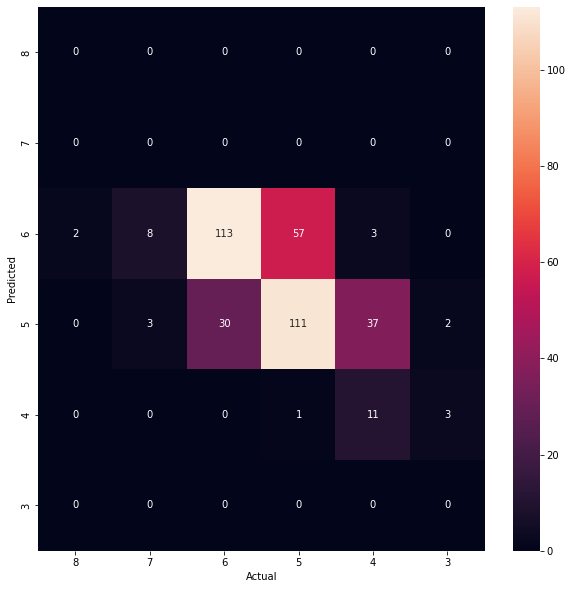

In [363]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_pred_test_qua_svm, Y_test_qua), annot=True, xticklabels=[8,7,6,5,4,3], yticklabels=[8,7,6,5,4,3], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Treating this as baseline model. Let's tune the hyperparametere</h4>

In [365]:
svc = SVC()

grid_param = {
    'C':[1,10,20,50,100,150,200,300,500],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[1,2,3,4,5,6],
    'decision_function_shape':['ovo', 'ovr'],
    'gamma':['scale', 'auto']
}

grid_svc = GridSearchCV(svc, param_grid=grid_param, n_jobs=-1, cv=3)
grid_svc.fit(X_train_qua, Y_train_qua)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 20, 50, 100, 150, 200, 300, 500],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [366]:
grid_svc.best_params_

{'C': 1,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'rbf'}

In [367]:
grid_svc.best_score_

0.6141732283464567

<h4>Building Model with best Parameters</h4>

In [381]:
svccv = SVC(decision_function_shape='ovr', kernel='rbf', C=2)
svccv.fit(X_train_qua, Y_train_qua)

y_pred_train_qua_svccv = svccv.predict(X_train_qua)
y_pred_test_qua_svccv = svccv.predict(X_test_qua)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_qua_svccv, Y_train_qua))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_qua_svccv, Y_test_qua))

print("Classification Report")
print(classification_report(y_pred_test_qua_svccv, Y_test_qua))

Training Accuracy on Qualtiy :  0.652668416447944
Testing Accuracy on Quality : 0.6194225721784777
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.78      0.62      0.69       181
           6       0.65      0.60      0.63       182
           7       0.27      0.78      0.41        18
           8       0.00      0.00      0.00         0

    accuracy                           0.62       381
   macro avg       0.28      0.33      0.29       381
weighted avg       0.70      0.62      0.65       381



Text(69.0, 0.5, 'Predicted')

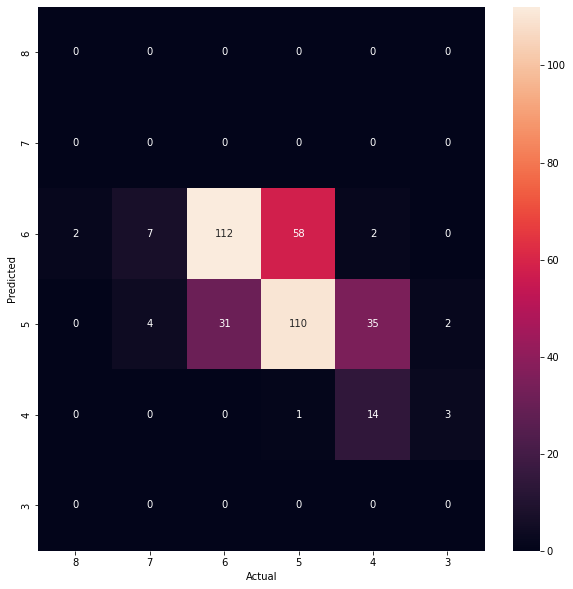

In [382]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_pred_test_qua_svccv, Y_test_qua), annot=True, xticklabels=[8,7,6,5,4,3], yticklabels=[8,7,6,5,4,3], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>KNN  performed better than this SVM Model</strong>

<h3>SVM on binary Quality</h3>

Training Accuracy on Qualtiy :  0.7760279965004374
Testing Accuracy on Quality : 0.7427821522309711
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       179
           1       0.76      0.76      0.76       202

    accuracy                           0.74       381
   macro avg       0.74      0.74      0.74       381
weighted avg       0.74      0.74      0.74       381



Text(24.0, 0.5, 'Predicted')

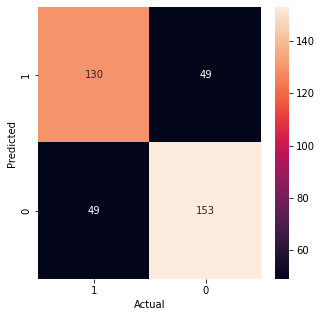

In [384]:
svc = SVC()

svc.fit(X_train_bq, Y_train_bq)
y_pred_train_bq_svc = svc.predict(X_train_bq)

y_pred_test_bq_svc = svc.predict(X_test_bq)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_bq_svc, Y_train_bq))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_bq_svc, Y_test_bq))
print("Classification Report")
print(classification_report(y_pred_test_bq_svc, Y_test_bq))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_test_bq_svc, Y_test_bq), annot=True, xticklabels=[1,0], yticklabels=[1,0], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Treating above model as baseline. Let's Tune the hyperparameters</h4>

In [385]:
svc = SVC()

grid_param = {
    'C':[1,10,20,50,100,150,200,300,500],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[1,2,3,4,5,6],
    'decision_function_shape':['ovo', 'ovr'],
    'gamma':['scale', 'auto']
}

grid_svcbq = GridSearchCV(svc, param_grid=grid_param, n_jobs=-1, cv=3)
grid_svcbq.fit(X_train_bq, Y_train_bq)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 20, 50, 100, 150, 200, 300, 500],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [386]:
grid_svcbq.best_score_

0.7454068241469817

In [387]:
grid_svcbq.best_params_

{'C': 1,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'rbf'}

<h4>Building Model with best parameters</h4>

Training Accuracy on Qualtiy :  0.7821522309711286
Testing Accuracy on Quality : 0.7427821522309711
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       177
           1       0.76      0.75      0.76       204

    accuracy                           0.74       381
   macro avg       0.74      0.74      0.74       381
weighted avg       0.74      0.74      0.74       381



Text(24.0, 0.5, 'Predicted')

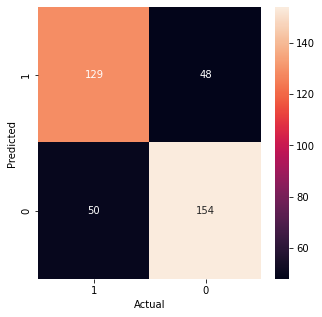

In [404]:
svccv = SVC(kernel='rbf', degree=1, decision_function_shape='ovo', C=2)

svccv.fit(X_train_bq, Y_train_bq)
y_pred_train_bq_svccv = svccv.predict(X_train_bq)

y_pred_test_bq_svccv = svccv.predict(X_test_bq)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_bq_svccv, Y_train_bq))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_bq_svccv, Y_test_bq))
print("Classification Report")
print(classification_report(y_pred_test_bq_svccv, Y_test_bq))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_test_bq_svccv, Y_test_bq), annot=True, xticklabels=[1,0], yticklabels=[1,0], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [405]:
fprsvc, tprsvc, thresholdsvc = roc_curve(Y_test_bq, y_pred_test_bq_svccv)
print('Threshold =', thresholdsvc)
print('True Positive Rate =', tprsvc)
print('False Positive Rate =', fprsvc)

Threshold = [2 1 0]
True Positive Rate = [0.         0.76237624 1.        ]
False Positive Rate = [0.         0.27932961 1.        ]


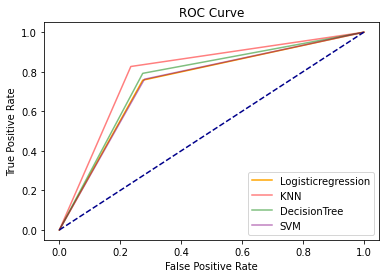

In [412]:
plt.plot(fprlr, tprlr, color='orange', label='Logisticregression', alpha=1.0)
plt.plot(fprknn, tprknn, color='red', label='KNN', alpha=0.5)
plt.plot(fprdt, tprdt, color='green', label='DecisionTree', alpha=0.5)
plt.plot(fprsvc, tprsvc, color='purple', label='SVM', alpha=0.5)
plt.plot([0,1], [0,1], color='darkblue', ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [413]:
auc_scoresvc = roc_auc_score(Y_test_bq, y_pred_test_bq_svccv)
auc_scoresvc

0.7415233143426073

<strong>SVM does not perform well than KNeighborsClassifier</strong>

<h3>RandomForest Classifier on Quality</h3>

In [414]:
from sklearn.ensemble import RandomForestClassifier

In [498]:
rfqua = RandomForestClassifier()

rfqua.fit(X_train_qua, Y_train_qua)

y_pred_train_qua_rf = rfqua.predict(X_train_qua)
y_pred_test_qua_rf = rfqua.predict(X_test_qua)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_qua_rf, Y_train_qua))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_qua_rf, Y_test_qua))

print("Classification Report")
print(classification_report(y_pred_test_qua_rf, Y_test_qua))

Training Accuracy on Qualtiy :  1.0
Testing Accuracy on Quality : 0.6876640419947506
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         2
           5       0.80      0.68      0.73       170
           6       0.72      0.69      0.70       178
           7       0.49      0.83      0.62        30
           8       0.00      0.00      0.00         1

    accuracy                           0.69       381
   macro avg       0.34      0.37      0.34       381
weighted avg       0.73      0.69      0.70       381



Text(69.0, 0.5, 'Predicted')

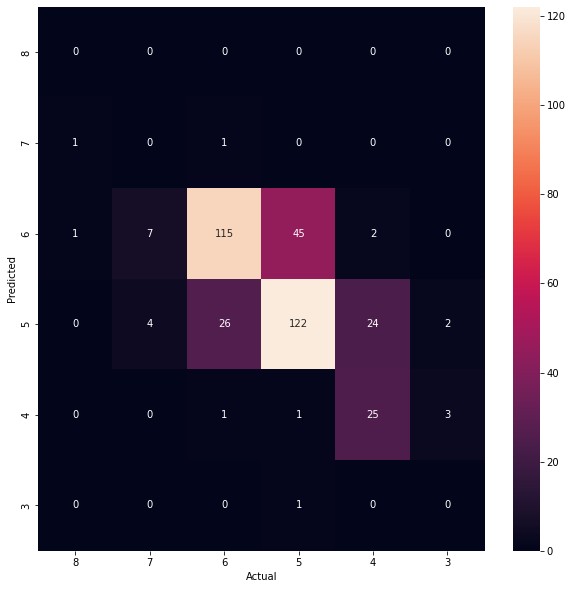

In [499]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_pred_test_qua_rf, Y_test_qua), annot=True, xticklabels=[8,7,6,5,4,3], yticklabels=[8,7,6,5,4,3], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Treating Above model as baseline, Lets tune the hyperparameters</h4>

In [421]:
rf = RandomForestClassifier()

grid_param = {
    'n_estimators':np.arange(10,500,50),
    'criterion':['gini', 'entropy'],
    'max_depth':[5,6,7,8,9,10,11,12,13,14],
    'min_samples_split':[2,3,4,5,6,7],
    'min_samples_leaf':[3,4,5,6,7,8],
    'max_leaf_nodes':[10,20,30,40,50,6,80],
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rf, param_grid=grid_param, n_jobs=-1, cv=3)

grid_rf.fit(X_train_qua, Y_train_qua)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_leaf_nodes': [10, 20, 30, 40, 50, 6, 80],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460]),
                         'n_jobs': [-1]})

In [422]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_leaf_nodes': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 160,
 'n_jobs': -1}

In [423]:
grid_rf.best_score_

0.6491688538932633

<h4>Building model with best params</h4>

In [451]:
rfcv = RandomForestClassifier(criterion='entropy', max_depth=14, max_leaf_nodes=80, min_samples_leaf=3, min_samples_split=2, n_estimators=160, n_jobs=-1)
rfcv.fit(X_train_qua, Y_train_qua)

y_pred_train_qua_rfcv = rfcv.predict(X_train_qua)
y_pred_test_qua_rfcv = rfcv.predict(X_test_qua)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_qua_rfcv, Y_train_qua))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_qua_rfcv, Y_test_qua))

print("Classification Report")
print(classification_report(y_pred_test_qua_rfcv, Y_test_qua))

Training Accuracy on Qualtiy :  0.8328958880139983
Testing Accuracy on Quality : 0.6325459317585301
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.80      0.63      0.71       182
           6       0.64      0.62      0.63       175
           7       0.33      0.71      0.45        24
           8       0.00      0.00      0.00         0

    accuracy                           0.63       381
   macro avg       0.30      0.33      0.30       381
weighted avg       0.70      0.63      0.66       381



Text(69.0, 0.5, 'Predicted')

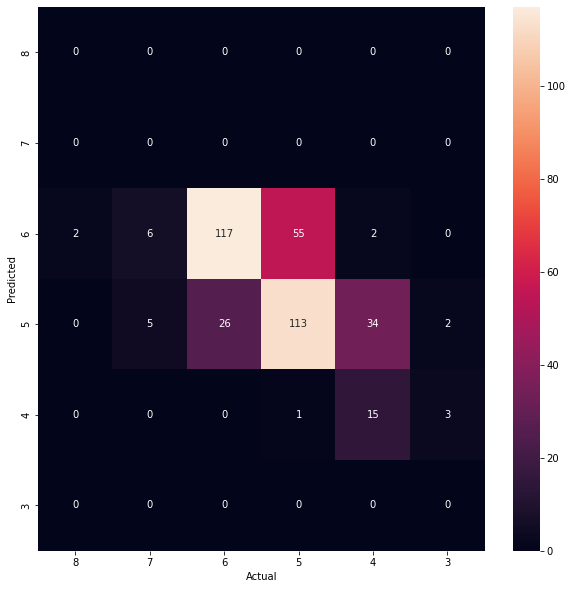

In [443]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_pred_test_qua_rfcv, Y_test_qua), annot=True, xticklabels=[8,7,6,5,4,3], yticklabels=[8,7,6,5,4,3], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>Baseline model was performing better but it was overfitting on training data.</strong>

<h3>Random Forest Classifier on Binary Qualtiy</h3>

Training Accuracy on Qualtiy :  1.0
Testing Accuracy on Quality : 0.800524934383202
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       175
           1       0.82      0.81      0.81       206

    accuracy                           0.80       381
   macro avg       0.80      0.80      0.80       381
weighted avg       0.80      0.80      0.80       381



Text(24.0, 0.5, 'Predicted')

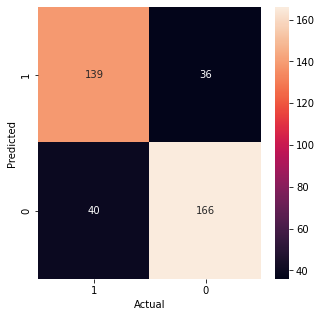

In [502]:
rfbq = RandomForestClassifier()

rfbq.fit(X_train_bq, Y_train_bq)
y_pred_train_bq_rf = rfbq.predict(X_train_bq)

y_pred_test_bq_rf = rfbq.predict(X_test_bq)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_bq_rf, Y_train_bq))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_bq_rf, Y_test_bq))
print("Classification Report")
print(classification_report(y_pred_test_bq_rf, Y_test_bq))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_test_bq_rf, Y_test_bq), annot=True, xticklabels=[1,0], yticklabels=[1,0], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Treating this as base model. Lets tune the hyperprameters</h4>

In [457]:
rf = RandomForestClassifier()

grid_param = {
    'n_estimators':[100,140,150,160],
    'criterion':['gini', 'entropy'],
    'max_depth':[10,11,12,13,14],
    'min_samples_split':[2,3],
    'min_samples_leaf':[3,4,5],
    'max_leaf_nodes':[50,60,80,90],
    'n_jobs':[-1]
}
grid_rf = GridSearchCV(rf, param_grid=grid_param, n_jobs=-1, cv=3)
grid_rf.fit(X_train_bq, Y_train_bq)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 12, 13, 14],
                         'max_leaf_nodes': [50, 60, 80, 90],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 140, 150, 160], 'n_jobs': [-1]})

In [458]:
grid_rf.best_score_

0.7891513560804899

In [459]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'max_leaf_nodes': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 150,
 'n_jobs': -1}

<h4>Building Model wioth best param</h4>

Training Accuracy on Qualtiy :  0.9352580927384077
Testing Accuracy on Quality : 0.7847769028871391
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       175
           1       0.81      0.79      0.80       206

    accuracy                           0.78       381
   macro avg       0.78      0.78      0.78       381
weighted avg       0.79      0.78      0.78       381



Text(24.0, 0.5, 'Predicted')

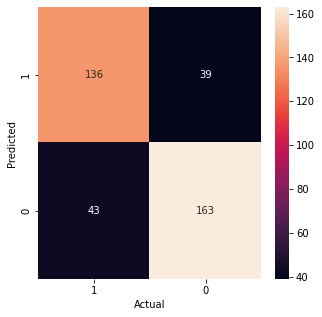

In [479]:
rfcv = RandomForestClassifier(criterion='entropy', max_depth=13, max_leaf_nodes=90, min_samples_leaf=3, min_samples_split=3, n_estimators=154, n_jobs=-1)

rfcv.fit(X_train_bq, Y_train_bq)
y_pred_train_bq_rfcv = rfcv.predict(X_train_bq)

y_pred_test_bq_rfcv = rfcv.predict(X_test_bq)

print("Training Accuracy on Qualtiy : ", accuracy_score(y_pred_train_bq_rfcv, Y_train_bq))
print("Testing Accuracy on Quality :", accuracy_score(y_pred_test_bq_rfcv, Y_test_bq))
print("Classification Report")
print(classification_report(y_pred_test_bq_rfcv, Y_test_bq))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_test_bq_rfcv, Y_test_bq), annot=True, xticklabels=[1,0], yticklabels=[1,0], fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>Baseline model was doing well on trainig data, but with slight overfitting. Choposing baseline to compare with other models</strong>

In [484]:
fprrf, tprrf, thresholdsrf = roc_curve(Y_test_bq, y_pred_test_bq_rf)
print('Threshold =', thresholdsrf)
print('True Positive Rate =', tprrf)
print('False Positive Rate =', fprrf)

Threshold = [2 1 0]
True Positive Rate = [0.         0.83663366 1.        ]
False Positive Rate = [0.        0.2122905 1.       ]


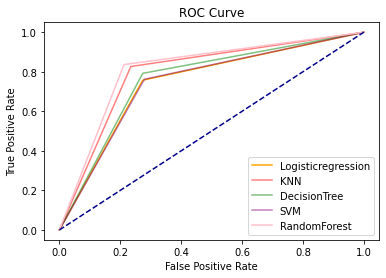

In [485]:
plt.plot(fprlr, tprlr, color='orange', label='Logisticregression', alpha=1.0)
plt.plot(fprknn, tprknn, color='red', label='KNN', alpha=0.5)
plt.plot(fprdt, tprdt, color='green', label='DecisionTree', alpha=0.5)
plt.plot(fprsvc, tprsvc, color='purple', label='SVM', alpha=0.5)
plt.plot(fprrf, tprrf, color='pink', label='RandomForest', alpha=1.0)
plt.plot([0,1], [0,1], color='darkblue', ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [486]:
auc_scorerf = roc_auc_score(Y_test_bq, y_pred_test_bq_rf)
auc_scorerf

0.8121715802865201

<strong>RandomForest performs better than KNN on Binary Quality, and it also performs better than KNN on Quality.</strong>

<h3>Saving Both Models using PIckle</h3>

In [487]:
import pickle

In [501]:
filename='best_quality.pickle'
pickle.dump(rfqua, open(filename, 'wb'))

In [504]:
filename = 'best_binary_quality.pickle'
pickle.dump(rfbq, open(filename, 'wb'))